In [21]:
#Import data
import os
from datetime import datetime
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

data_dir = "/Users/ldosnon/Desktop/data_yolov8/Peak_segmentation_database/Labeled_array/CT/train/"

# Initialize empty lists to store data from all files
X_list = []
y_list = []

scaler = MinMaxScaler()


# Loop through each file in the directory
for file_name in os.listdir(data_dir):
    if file_name.endswith(".txt"):
        file_path = os.path.join(data_dir, file_name)

        # Load data from the current file
        data = np.loadtxt(file_path)

        # Assuming your data is structured with three columns
        X_file = data[:, :2]  # Assuming the first two columns are 'pixel_number' and 'intensity'
        y_file = data[:, 2]   # Assuming the third column is 'probability'
        
        
        #TRY NORMALIZING THE DATA
        X_file = scaler.fit_transform(X_file)
        y_file = scaler.fit_transform(y_file.reshape(-1,1))



        X_list.append(X_file)
        y_list.append(y_file)

# Concatenate data from all files
X = np.concatenate(X_list, axis=0)
#The number of line is the pixel from all the files, columns 1: pixel number, colums 2 is intensity


y = np.concatenate(y_list, axis=0)

#y are the associated probabilites

print(np.shape(X))



(30365, 2)


Epoch 1/100
2430/2430 [==============================] - 2s 888us/step - loss: 0.4254 - accuracy: 0.8042 - val_loss: 0.3220 - val_accuracy: 0.8437
Epoch 2/100
2430/2430 [==============================] - 2s 862us/step - loss: 0.3528 - accuracy: 0.8392 - val_loss: 0.3141 - val_accuracy: 0.8452
Epoch 3/100
2430/2430 [==============================] - 2s 862us/step - loss: 0.3483 - accuracy: 0.8394 - val_loss: 0.3072 - val_accuracy: 0.8536
Epoch 4/100
2430/2430 [==============================] - 2s 872us/step - loss: 0.3431 - accuracy: 0.8431 - val_loss: 0.3084 - val_accuracy: 0.8470
Epoch 5/100
2430/2430 [==============================] - 2s 867us/step - loss: 0.3380 - accuracy: 0.8461 - val_loss: 0.2979 - val_accuracy: 0.8592
Epoch 6/100
2430/2430 [==============================] - 2s 876us/step - loss: 0.3321 - accuracy: 0.8491 - val_loss: 0.2950 - val_accuracy: 0.8574
Epoch 7/100
2430/2430 [==============================] - 2s 867us/step - loss: 0.3272 - accuracy: 0.8513 - val_loss: 0

2430/2430 [==============================] - 2s 871us/step - loss: 0.2486 - accuracy: 0.8900 - val_loss: 0.2216 - val_accuracy: 0.9005
Epoch 57/100
2430/2430 [==============================] - 2s 868us/step - loss: 0.2461 - accuracy: 0.8911 - val_loss: 0.2201 - val_accuracy: 0.9043
Epoch 58/100
2430/2430 [==============================] - 2s 869us/step - loss: 0.2457 - accuracy: 0.8906 - val_loss: 0.2220 - val_accuracy: 0.9005
Epoch 59/100
2430/2430 [==============================] - 2s 870us/step - loss: 0.2459 - accuracy: 0.8910 - val_loss: 0.2188 - val_accuracy: 0.9038
Epoch 60/100
2430/2430 [==============================] - 2s 871us/step - loss: 0.2470 - accuracy: 0.8915 - val_loss: 0.2216 - val_accuracy: 0.9033
Epoch 61/100
2430/2430 [==============================] - 2s 869us/step - loss: 0.2454 - accuracy: 0.8921 - val_loss: 0.2232 - val_accuracy: 0.9017
Epoch 62/100
2430/2430 [==============================] - 2s 872us/step - loss: 0.2457 - accuracy: 0.8910 - val_loss: 0.2247 

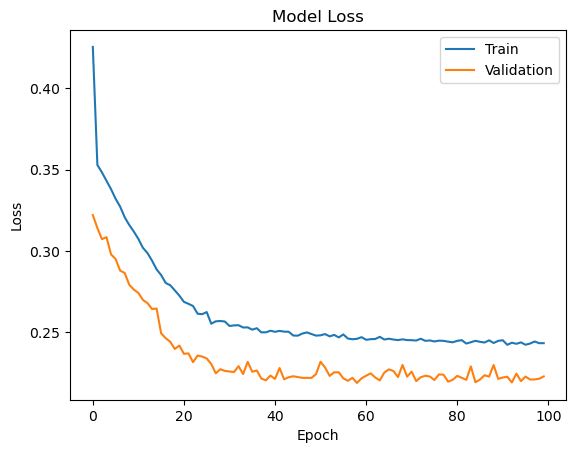

In [3]:
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation = 'sigmoid' )
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) 

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X, y, epochs=100, batch_size=10, validation_split=0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()



In [4]:
path="/Users/ldosnon/Desktop/data_yolov8/Peak_segmentation_database/"
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f'model_{current_time}.h5'
model.save(path + model_filename)

/Users/ldosnon/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


# Load the model from the file

def process_test(path_test_files):
    total_precision = []
    total_recall = []
    total_F1 = [] 
    total_accuracy = []
    for file_name in os.listdir(path_test_files):
        if file_name.endswith(".txt"):
            file_path = os.path.join(path_test_files, file_name)
            print(file_name)

            # Load data from the current file
            data = np.loadtxt(file_path)

            X_test = data[:, :2]  # Assuming the first two columns are 'pixel_number' and 'intensity'
            y_test = data[:, 2] 
            
            #Normalizing the data
            X_test = scaler.fit_transform(X_test)
            y_test = scaler.fit_transform(y_test.reshape(-1,1))

            predictions = loaded_model.predict(X_test)
            binary_predictions = (predictions >= 0.5).astype(int)


            pixel_nb = X_test[:,0]
            intensity_values = X_test[:,1]

            # Plot the original data points and predicted regions
            plt.figure(figsize=(12, 6))

            # Subplot for predicted regions
            plt.subplot(1, 2, 1)
            plt.plot(X_test[:, 0], X_test[:, 1], label='Original Data')

            regions_pred = []
            current_region_start = None

            for i in range(binary_predictions.shape[0]):
                if binary_predictions[i] == 1:
                    if current_region_start is None:
                        current_region_start = i
                else:
                    if current_region_start is not None:
                        regions_pred.append((current_region_start, i - 1))
                        current_region_start = None

            if current_region_start is not None:
                regions_pred.append((current_region_start, binary_predictions.shape[0] - 1))

            for region_start, region_end in regions_pred:
                plt.axvspan(X_test[region_start, 0], X_test[region_end, 0], color='r', alpha=0.3, label=np.unique('Region Predicted as peaks'))

            precision, recall, fscore, _ = precision_recall_fscore_support(y_test, binary_predictions, average='binary')
            accuracy = accuracy_score(y_test, binary_predictions)
           
            plt.title("Model Predictions")
            plt.xlabel("Normalized Pixel Number")
            plt.ylabel("Normalized Intensity")
            plt.legend()

            # Subplot for ground truth regions
            plt.subplot(1, 2, 2)
            plt.plot(X_test[:, 0], X_test[:, 1], label='Original Data')

            regions_gt = []
            current_region_start = None

            for i in range(y_test.shape[0]):
                if y_test[i] == 1:
                    if current_region_start is None:
                        current_region_start = i
                else:
                    if current_region_start is not None:
                        regions_gt.append((current_region_start, i - 1))
                        current_region_start = None

            if current_region_start is not None:
                regions_gt.append((current_region_start, y_test.shape[0] - 1))

            for region_start, region_end in regions_gt:
                plt.axvspan(X_test[region_start, 0], X_test[region_end, 0], color='g', alpha=0.3, label='Region Ground Truth as peaks')

            plt.title("Ground Truth Regions")
            plt.xlabel("Normalized Pixel Number")
            plt.ylabel("Normalized Intensity ")
            plt.legend()

            plt.tight_layout()
            plt.show()
            
            # Display the metrics
            total_accuracy.append(accuracy)
            total_precision.append(precision)
            total_recall.append(recall)
            total_F1.append(fscore)
            print(f'Accuracy: {accuracy:.2f}')
            print(f'Precision: {precision:.2f}')
            print(f'Recall (TP/(TP+FN)): {recall:.2f}')
            print(f'F1 Score (harmonic mean of precision and recall): {fscore:.2f}')
        

    print("Average accuracy of the model: ", np.mean(total_accuracy))
    print("Average precision of the model: ", np.mean(total_precision))
    print("Average recall of the model: ", np.mean(total_recall))
    print("Average f1 score of the model: ", np.mean(total_F1))




53-1_jpg.rf.18b70d250840d65963f34f8283ec5661.jpg.txt_labeled.txt
5/5 [==============================] - 0s 1ms/step


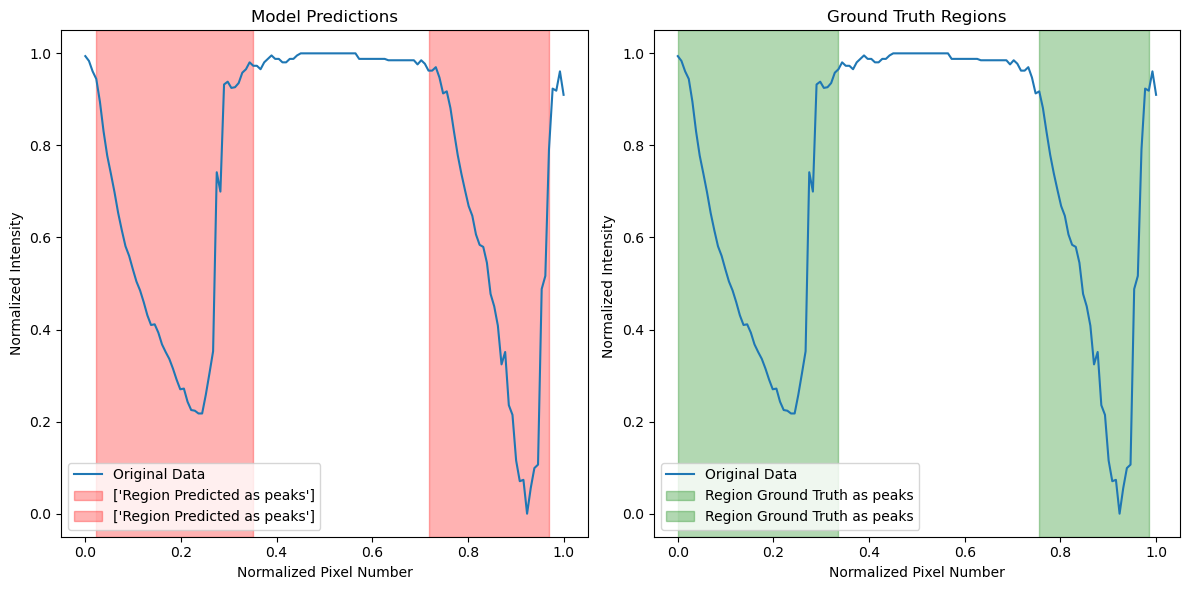

Accuracy: 0.91
Precision: 0.91
Recall (TP/(TP+FN)): 0.93
F1 Score (harmonic mean of precision and recall): 0.92
53-250_jpg.rf.b0d175b181aed936e82e456389629936.jpg.txt_labeled.txt
5/5 [==============================] - 0s 866us/step


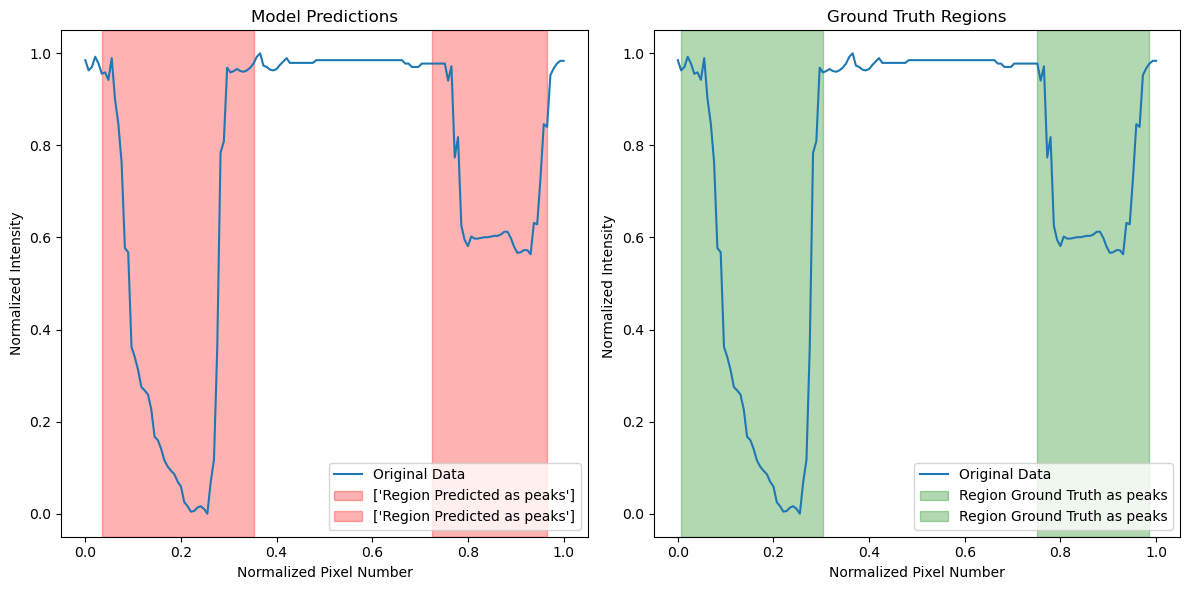

Accuracy: 0.88
Precision: 0.87
Recall (TP/(TP+FN)): 0.91
F1 Score (harmonic mean of precision and recall): 0.89
29-250-_jpg.rf.1b5fbd3c048d615f9b76adcb99e13cee.jpg.txt_labeled.txt
3/3 [==============================] - 0s 990us/step


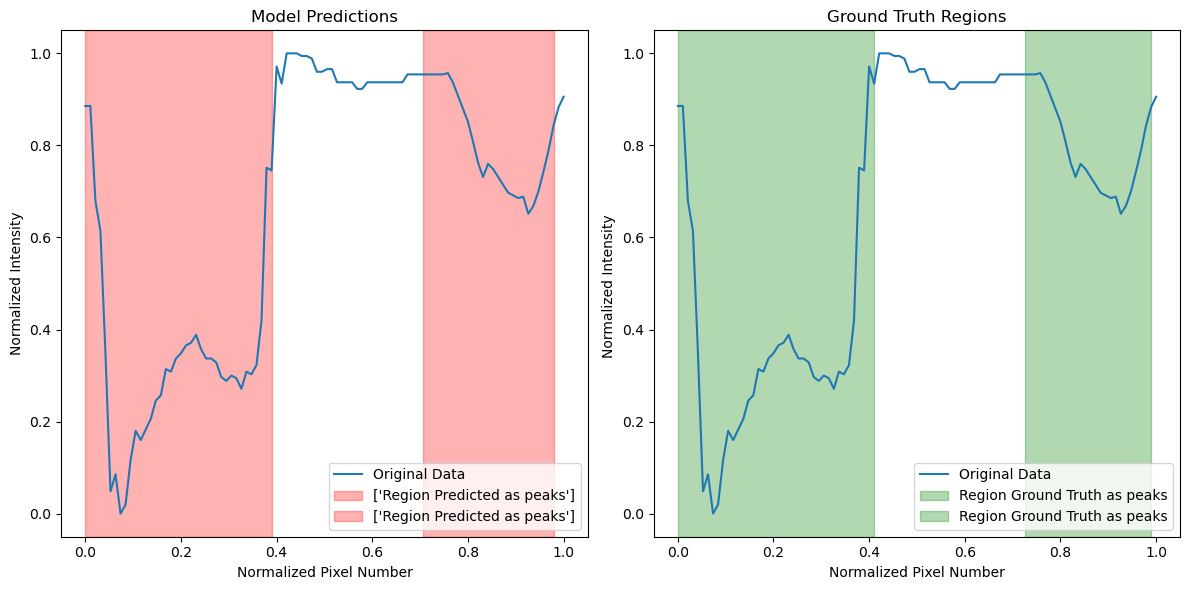

Accuracy: 0.95
Precision: 0.97
Recall (TP/(TP+FN)): 0.95
F1 Score (harmonic mean of precision and recall): 0.96
8-1000-_jpg.rf.cfe069b75cdd7b4c1ca5d4e86be39e8d.jpg.txt_labeled.txt
5/5 [==============================] - 0s 748us/step


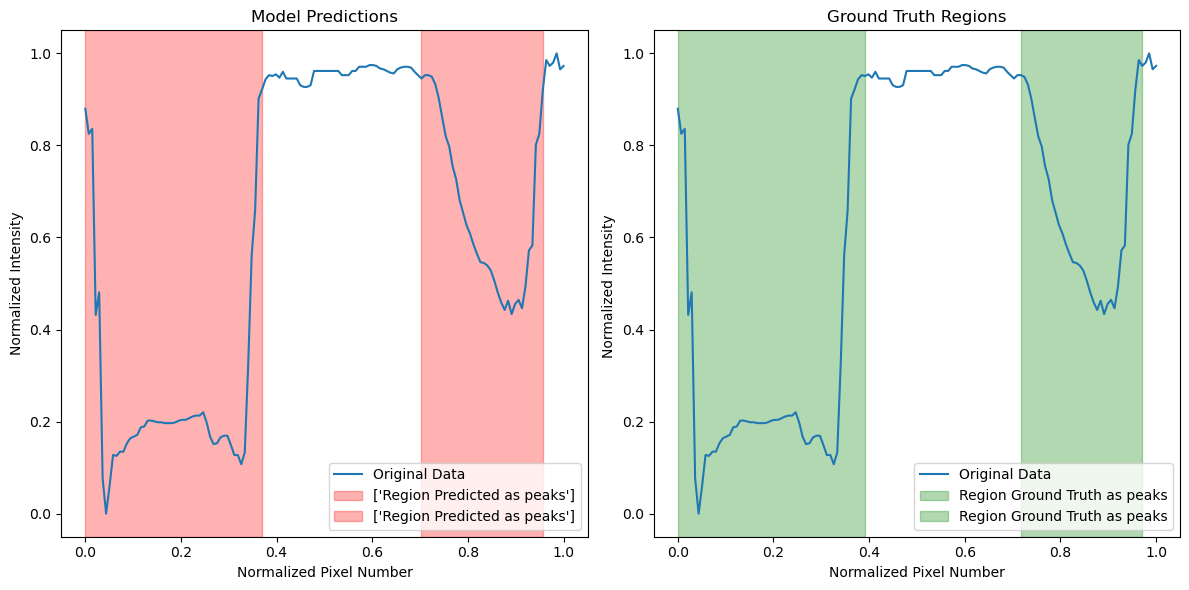

Accuracy: 0.95
Precision: 0.98
Recall (TP/(TP+FN)): 0.95
F1 Score (harmonic mean of precision and recall): 0.96
14-100_jpg.rf.e41a4529a427b57945e6559ac44f3d51.jpg.txt_labeled.txt
4/4 [==============================] - 0s 1ms/step


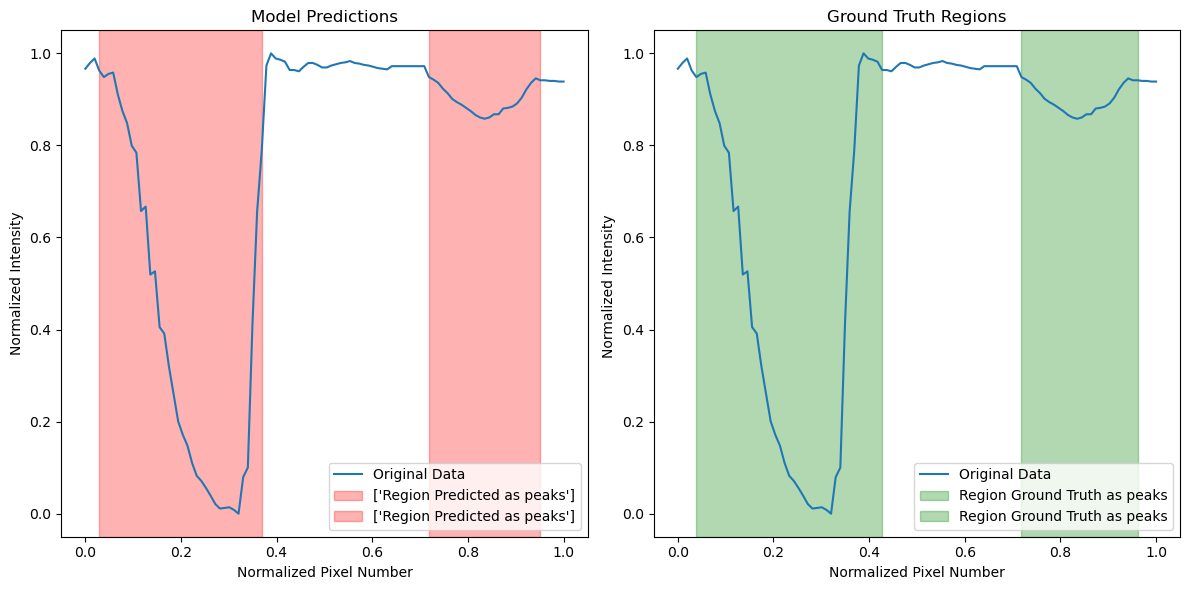

Accuracy: 0.92
Precision: 0.98
Recall (TP/(TP+FN)): 0.90
F1 Score (harmonic mean of precision and recall): 0.94
12-230_jpg.rf.e92ff4b09daf521ee507066cbde884b6.jpg.txt_labeled.txt
4/4 [==============================] - 0s 625us/step


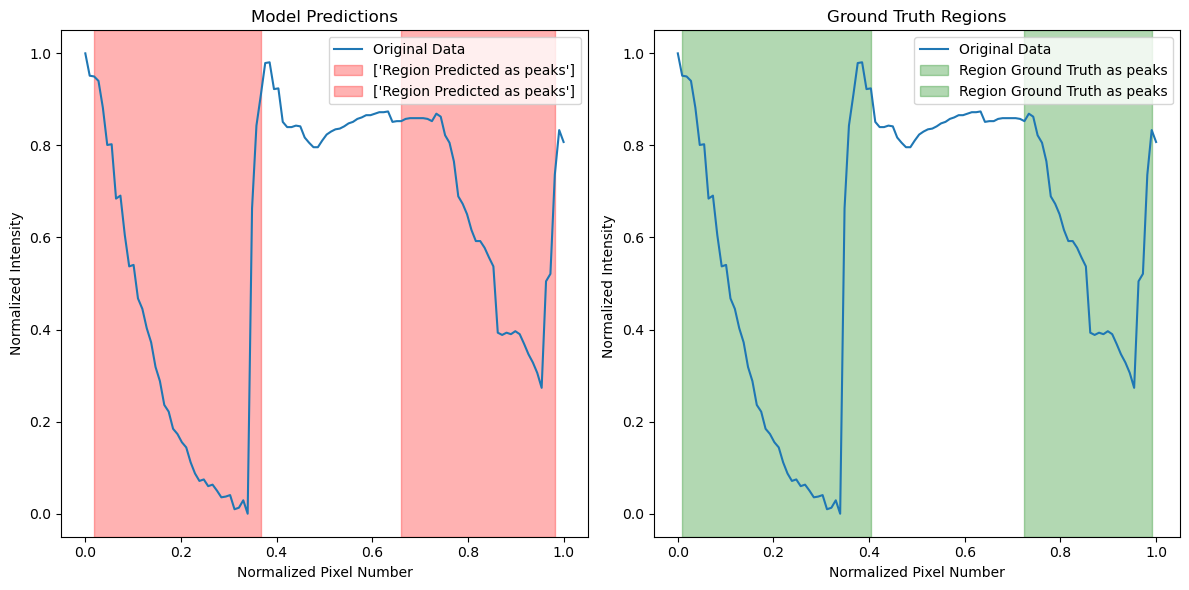

Accuracy: 0.88
Precision: 0.91
Recall (TP/(TP+FN)): 0.92
F1 Score (harmonic mean of precision and recall): 0.91
22-50-_jpg.rf.e3c626a6191b05f0a97c58f8f4d05ab1.jpg.txt_labeled.txt
4/4 [==============================] - 0s 1ms/step


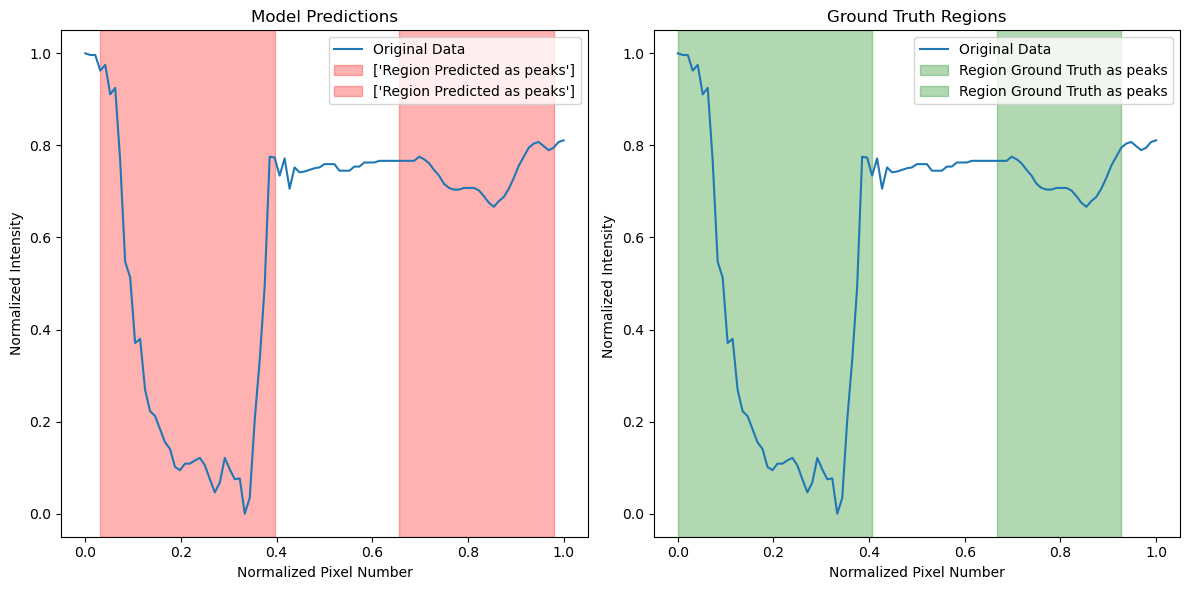

Accuracy: 0.90
Precision: 0.91
Recall (TP/(TP+FN)): 0.94
F1 Score (harmonic mean of precision and recall): 0.93
8-250_jpg.rf.2d008113a1bc42e7b7f66246c373be49.jpg.txt_labeled.txt
5/5 [==============================] - 0s 721us/step


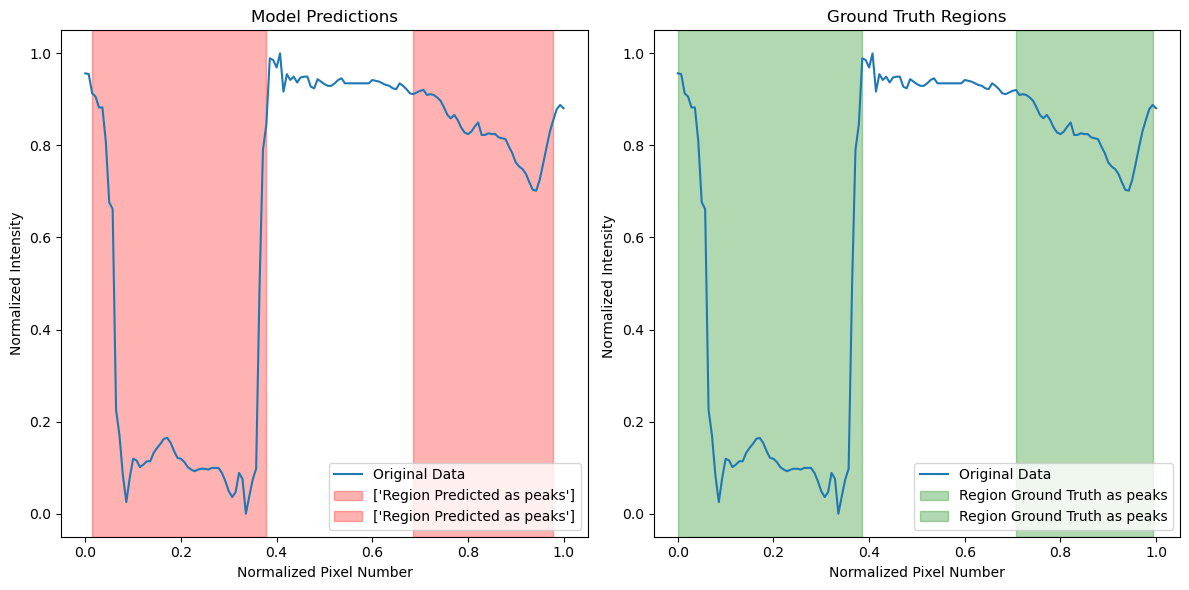

Accuracy: 0.94
Precision: 0.97
Recall (TP/(TP+FN)): 0.95
F1 Score (harmonic mean of precision and recall): 0.96
15-250-_jpg.rf.352fc879fe2a33819a210abaa3317023.jpg.txt_labeled.txt
3/3 [==============================] - 0s 831us/step


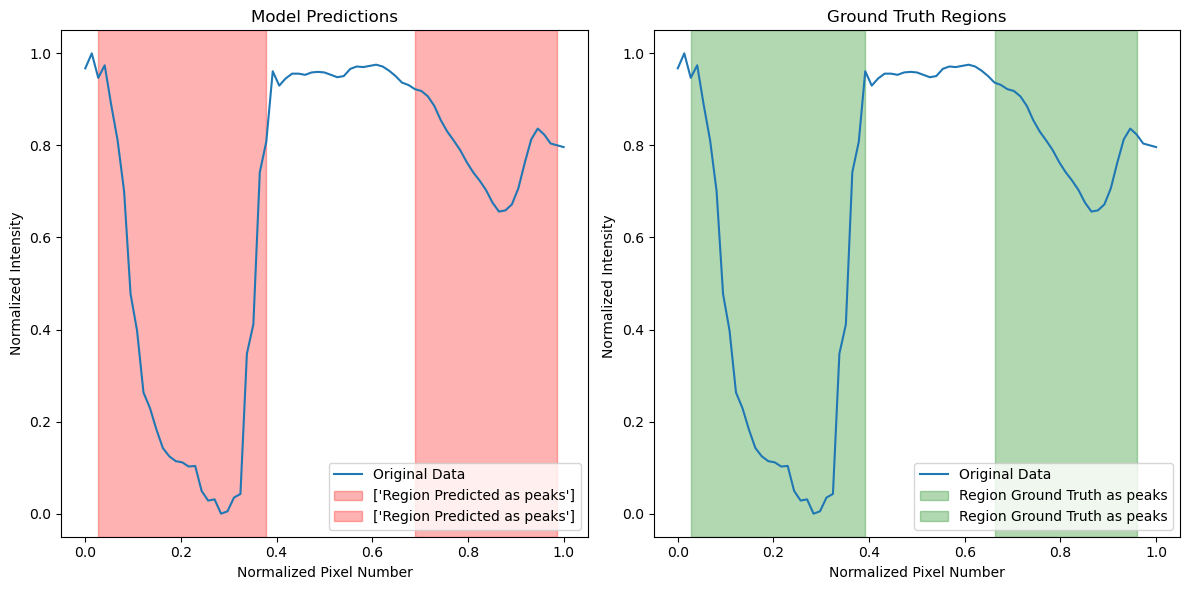

Accuracy: 0.93
Precision: 0.96
Recall (TP/(TP+FN)): 0.94
F1 Score (harmonic mean of precision and recall): 0.95
46-0_jpg.rf.7fbfc4f0052a3a2e4e0cd4d8f3f976bc.jpg.txt_labeled.txt
4/4 [==============================] - 0s 654us/step


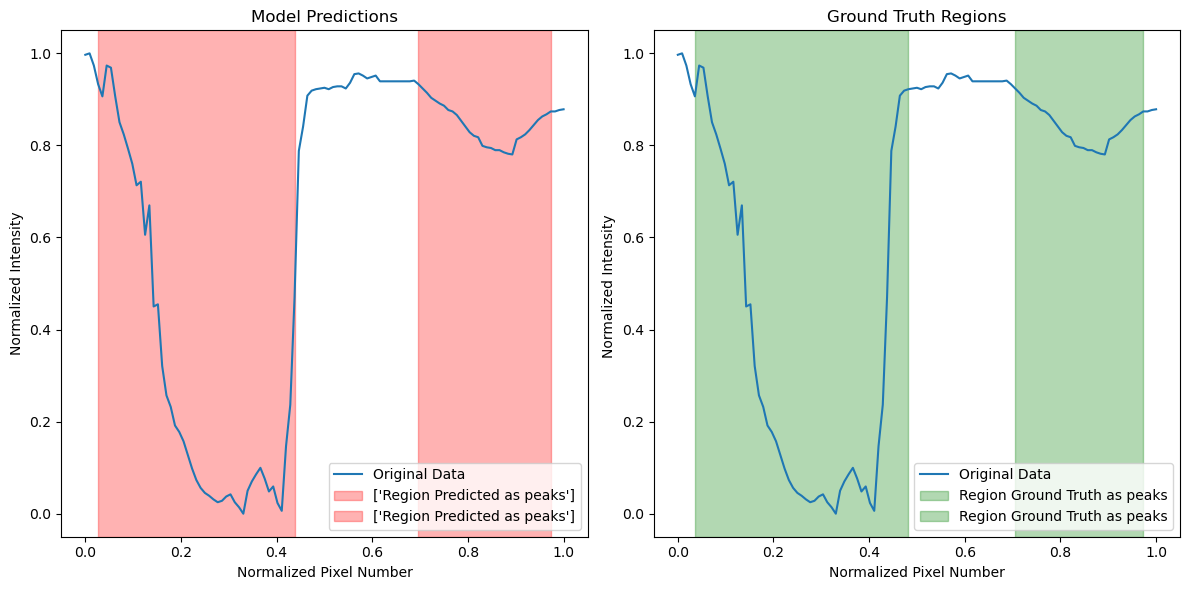

Accuracy: 0.94
Precision: 0.97
Recall (TP/(TP+FN)): 0.94
F1 Score (harmonic mean of precision and recall): 0.96
57-35_jpg.rf.0d76409ad3c825d756a2ef3e55724932.jpg.txt_labeled.txt
4/4 [==============================] - 0s 589us/step


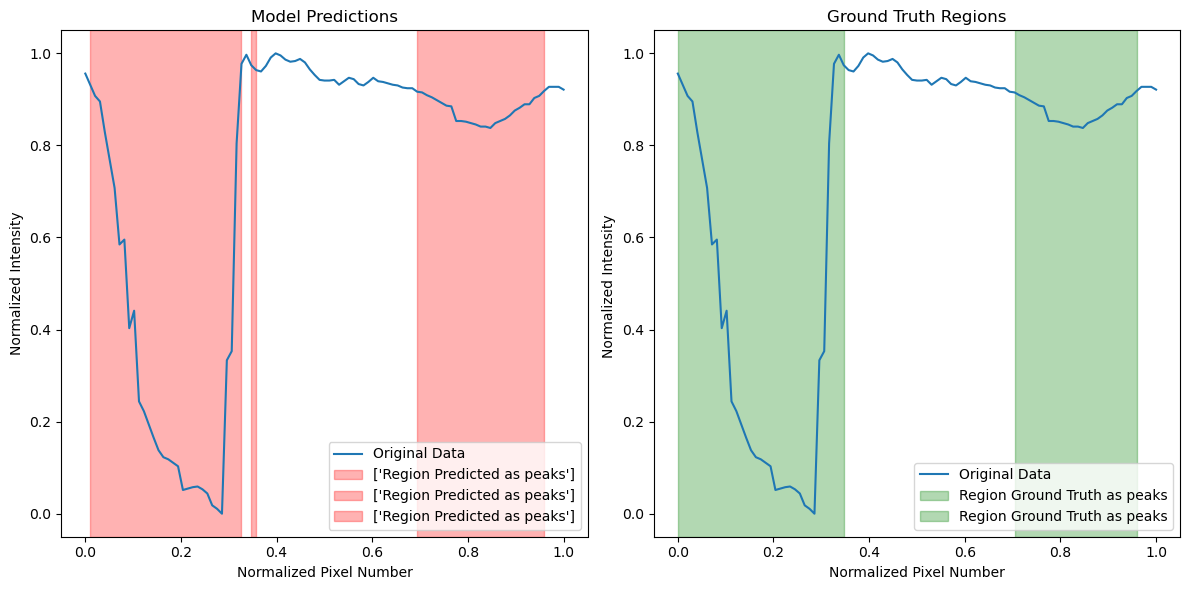

Accuracy: 0.96
Precision: 0.97
Recall (TP/(TP+FN)): 0.97
F1 Score (harmonic mean of precision and recall): 0.97
17-80-_jpg.rf.e3d2fc3a80d3add606380554fd17bf52.jpg.txt_labeled.txt
4/4 [==============================] - 0s 756us/step


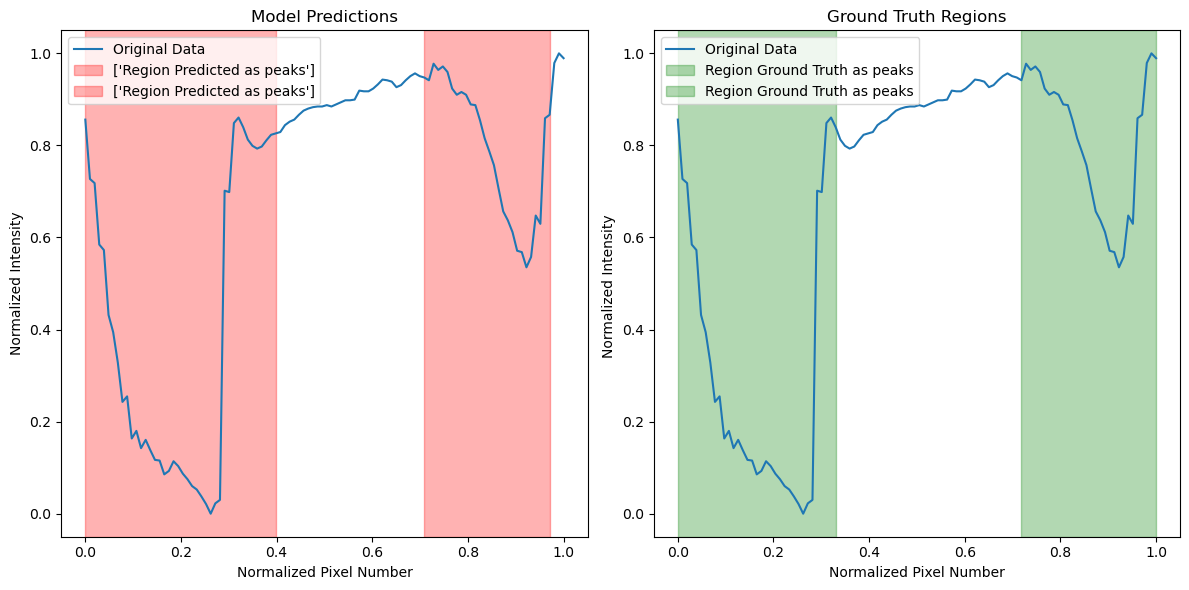

Accuracy: 0.89
Precision: 0.89
Recall (TP/(TP+FN)): 0.95
F1 Score (harmonic mean of precision and recall): 0.92
46-250-_jpg.rf.93cfffc5c13cd15eda3be0305b9f6320.jpg.txt_labeled.txt
4/4 [==============================] - 0s 700us/step


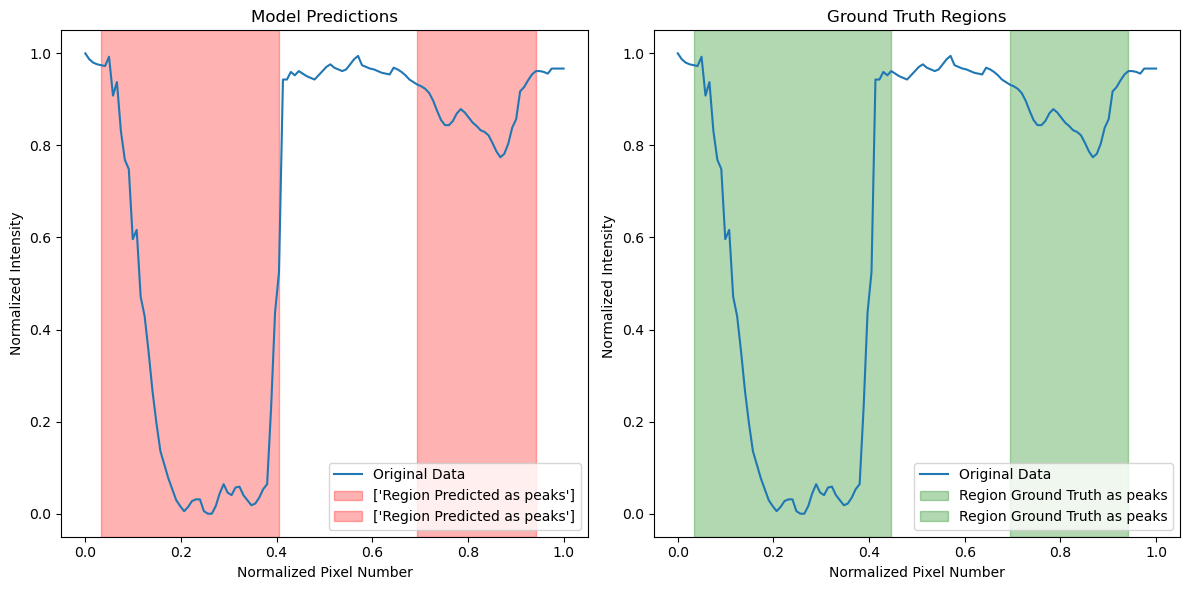

Accuracy: 0.96
Precision: 1.00
Recall (TP/(TP+FN)): 0.94
F1 Score (harmonic mean of precision and recall): 0.97
15-0-_jpg.rf.37839f7bd166ae9ce9ff5b598483059c.jpg.txt_labeled.txt
4/4 [==============================] - 0s 669us/step


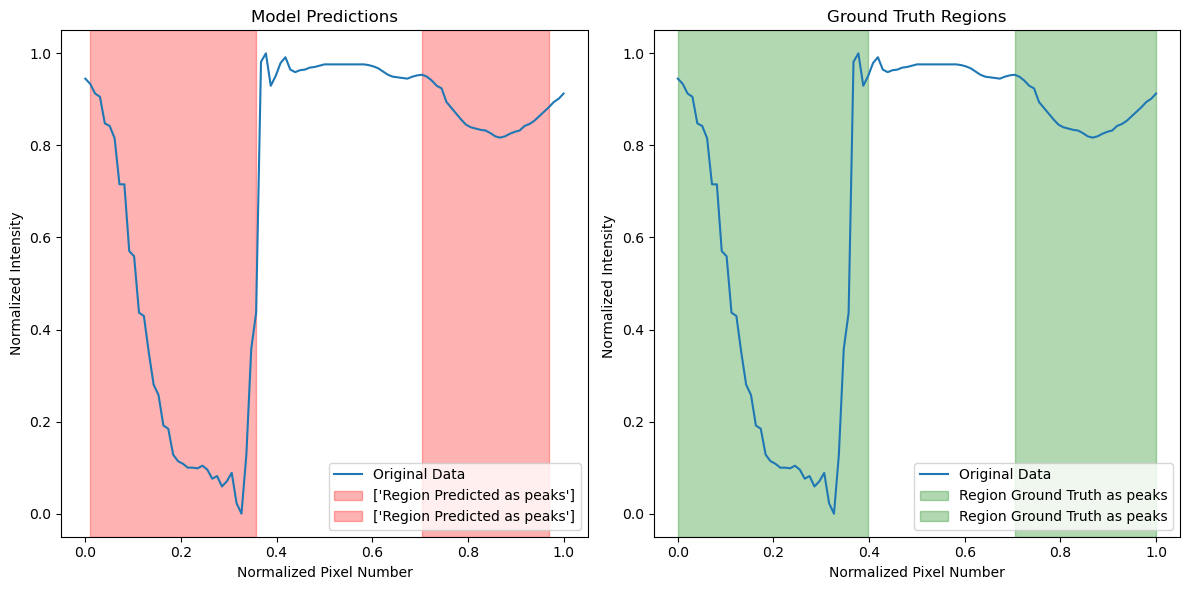

Accuracy: 0.92
Precision: 1.00
Recall (TP/(TP+FN)): 0.89
F1 Score (harmonic mean of precision and recall): 0.94
7-50-_jpg.rf.bfe3fc1b75d9e1991e63728a983173a2.jpg.txt_labeled.txt
4/4 [==============================] - 0s 619us/step


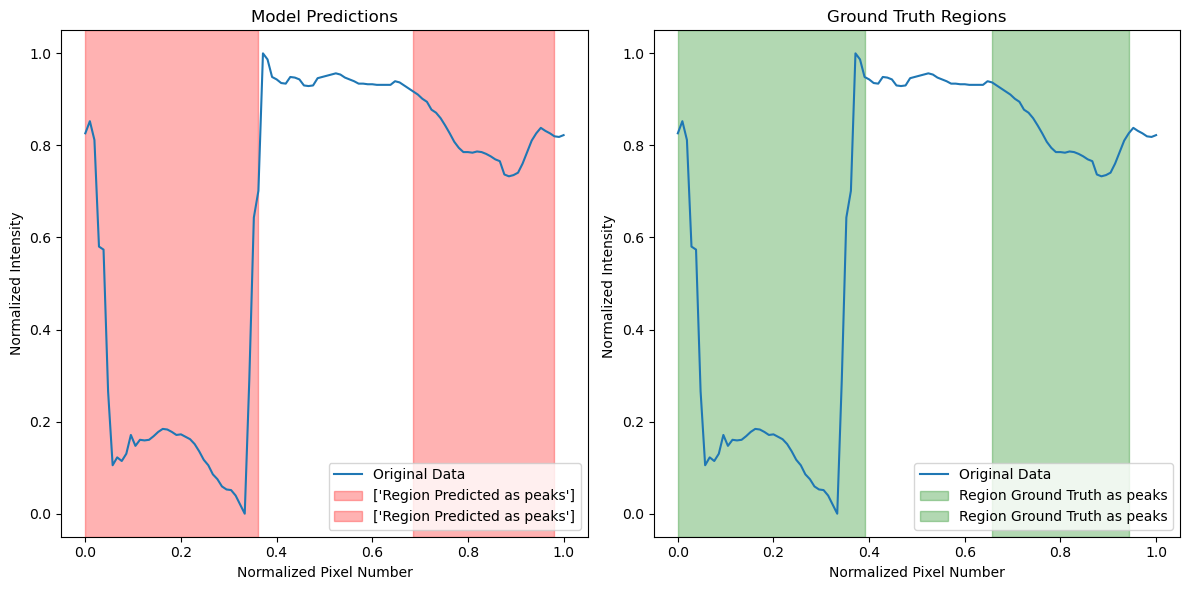

Accuracy: 0.91
Precision: 0.94
Recall (TP/(TP+FN)): 0.92
F1 Score (harmonic mean of precision and recall): 0.93
29-35_jpg.rf.779963ded8161f004521624f99ca05f5.jpg.txt_labeled.txt
3/3 [==============================] - 0s 745us/step


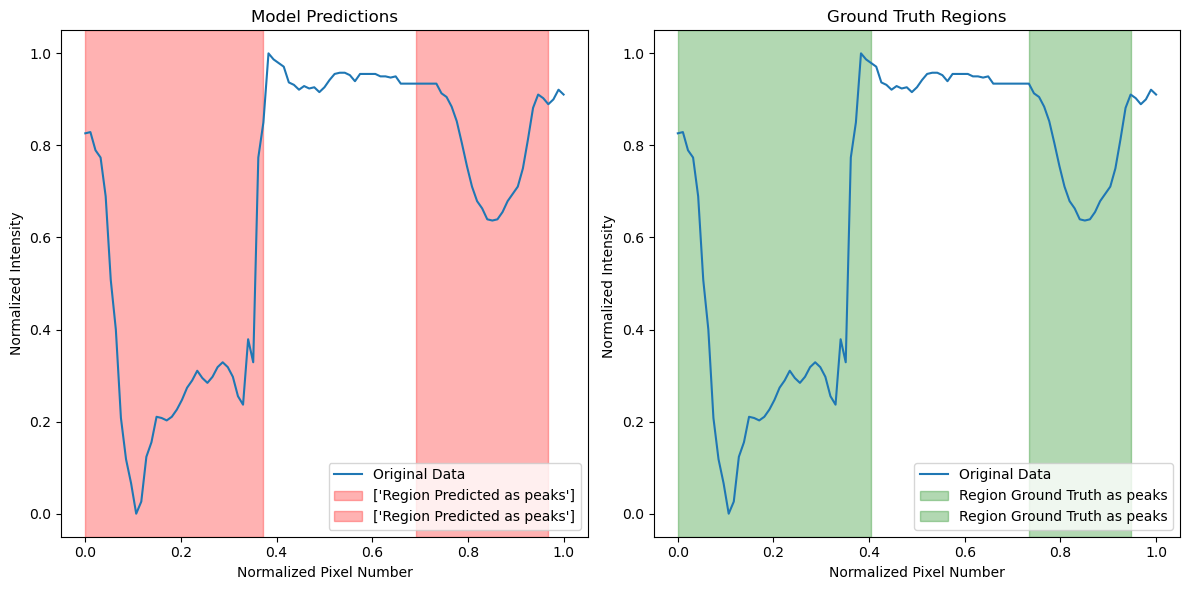

Accuracy: 0.91
Precision: 0.90
Recall (TP/(TP+FN)): 0.95
F1 Score (harmonic mean of precision and recall): 0.93
29-10_jpg.rf.6ddfc97a249fa6510ebbab15b9f28e11.jpg.txt_labeled.txt
3/3 [==============================] - 0s 701us/step


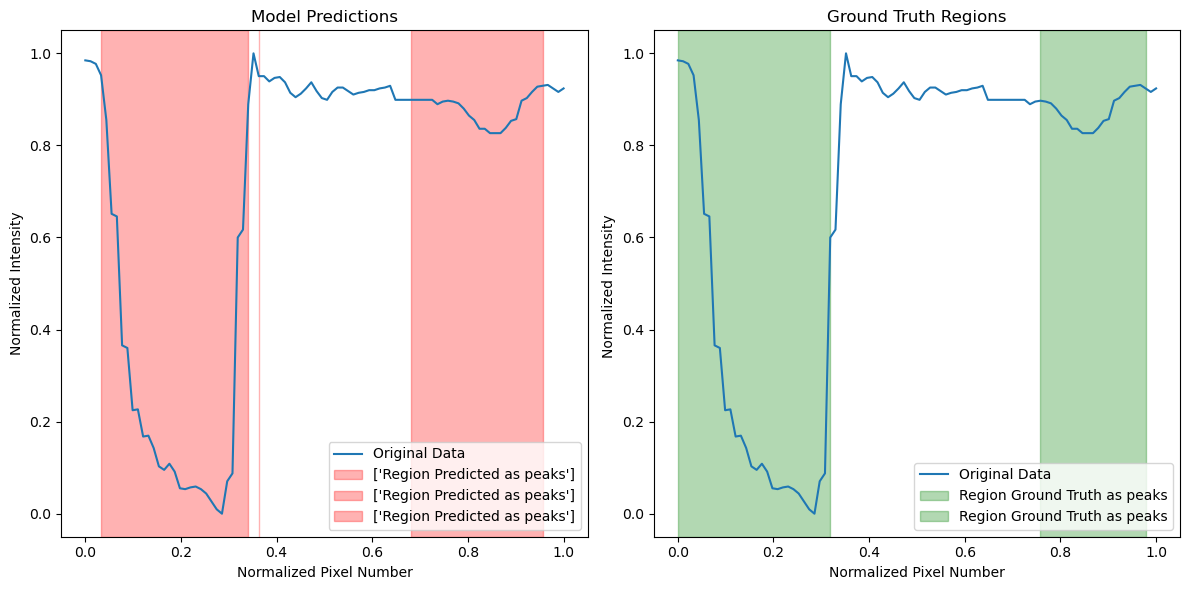

Accuracy: 0.84
Precision: 0.82
Recall (TP/(TP+FN)): 0.90
F1 Score (harmonic mean of precision and recall): 0.86
61-80_jpg.rf.e6e2236a2789b9401644cc5dc5adca0c.jpg.txt_labeled.txt
4/4 [==============================] - 0s 574us/step


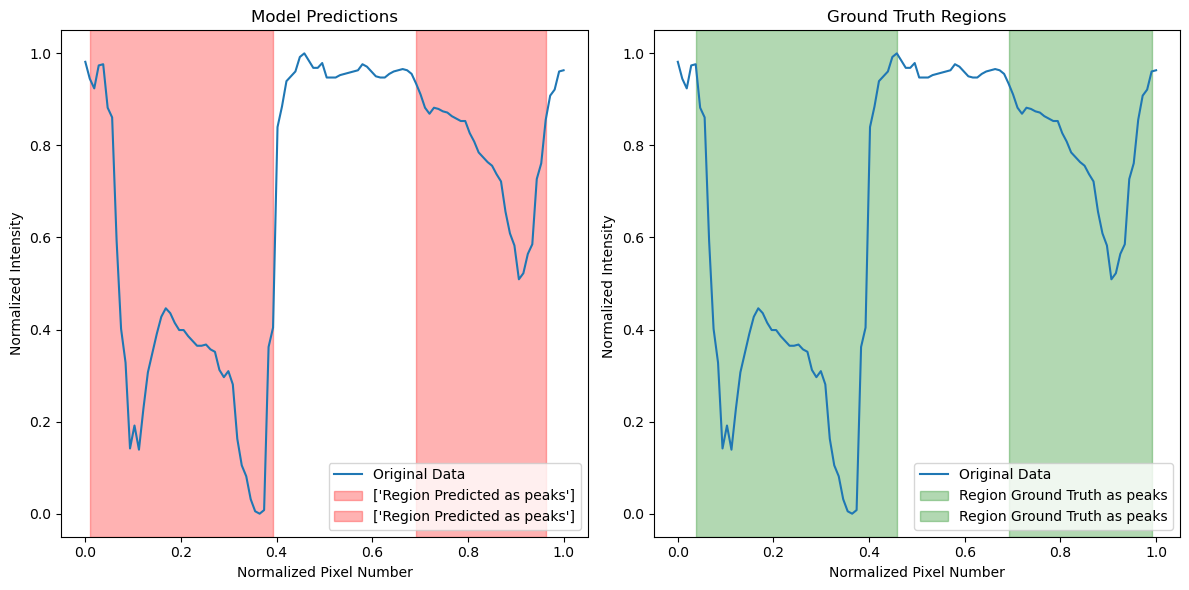

Accuracy: 0.88
Precision: 0.96
Recall (TP/(TP+FN)): 0.87
F1 Score (harmonic mean of precision and recall): 0.91
22-500-_jpg.rf.46741a3ddf613e9cb1d818f6811bdd78.jpg.txt_labeled.txt
4/4 [==============================] - 0s 613us/step


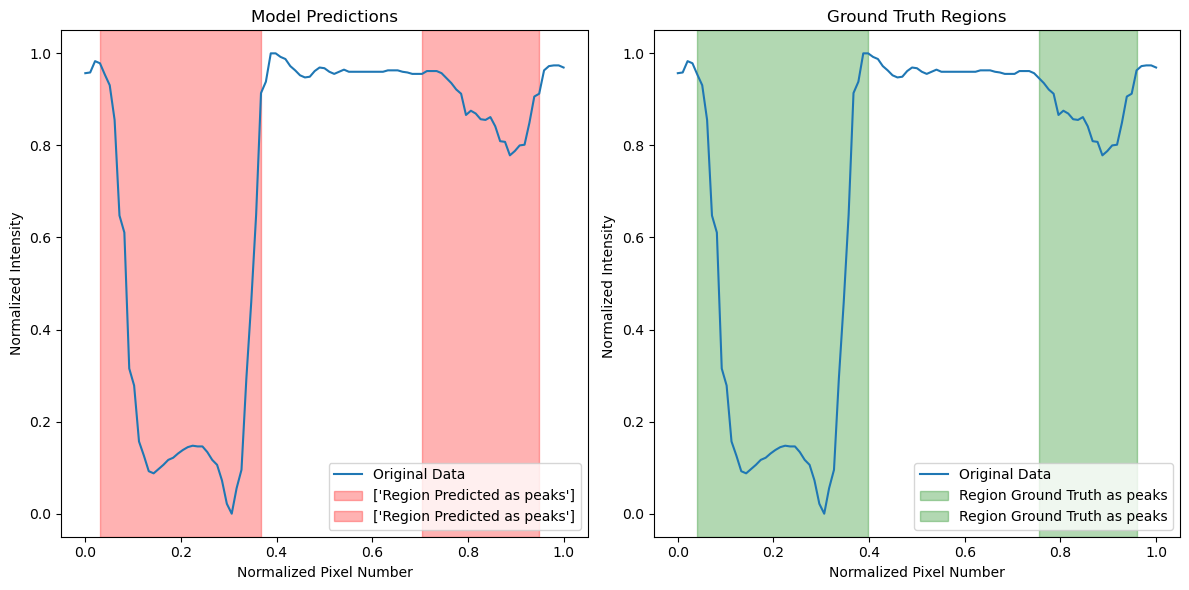

Accuracy: 0.90
Precision: 0.90
Recall (TP/(TP+FN)): 0.93
F1 Score (harmonic mean of precision and recall): 0.91
12-25_jpg.rf.b61cf44adbc14ddc2df6fb7805fb3d7f.jpg.txt_labeled.txt
4/4 [==============================] - 0s 561us/step


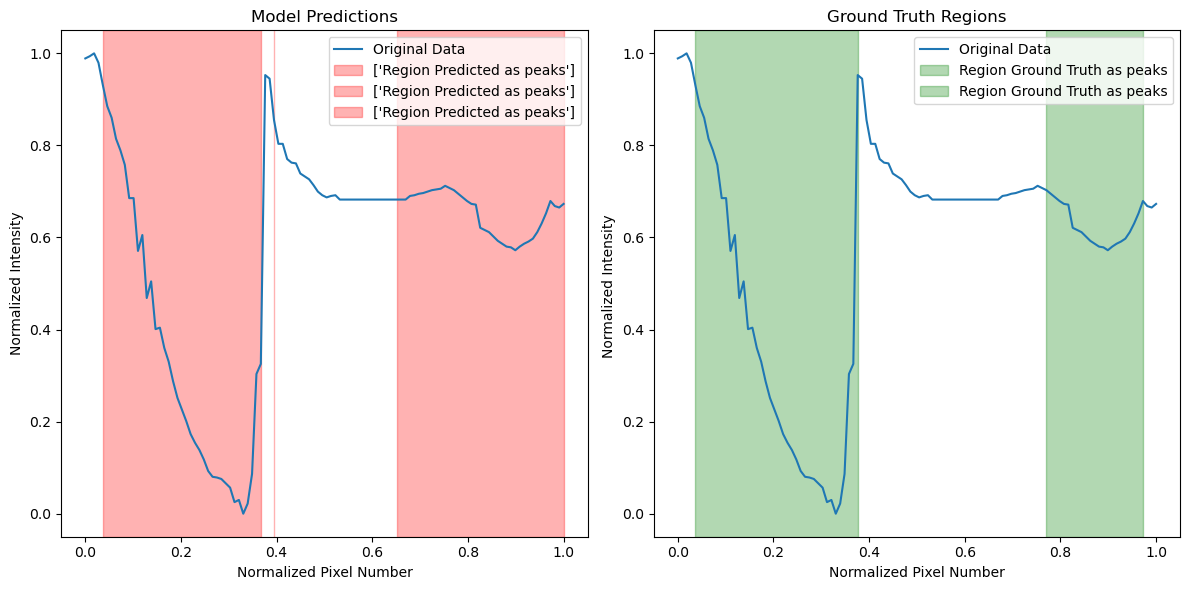

Accuracy: 0.84
Precision: 0.78
Recall (TP/(TP+FN)): 0.98
F1 Score (harmonic mean of precision and recall): 0.87
29-10-_jpg.rf.6bd597aab86be27e6957bb36b6ab87f5.jpg.txt_labeled.txt
4/4 [==============================] - 0s 571us/step


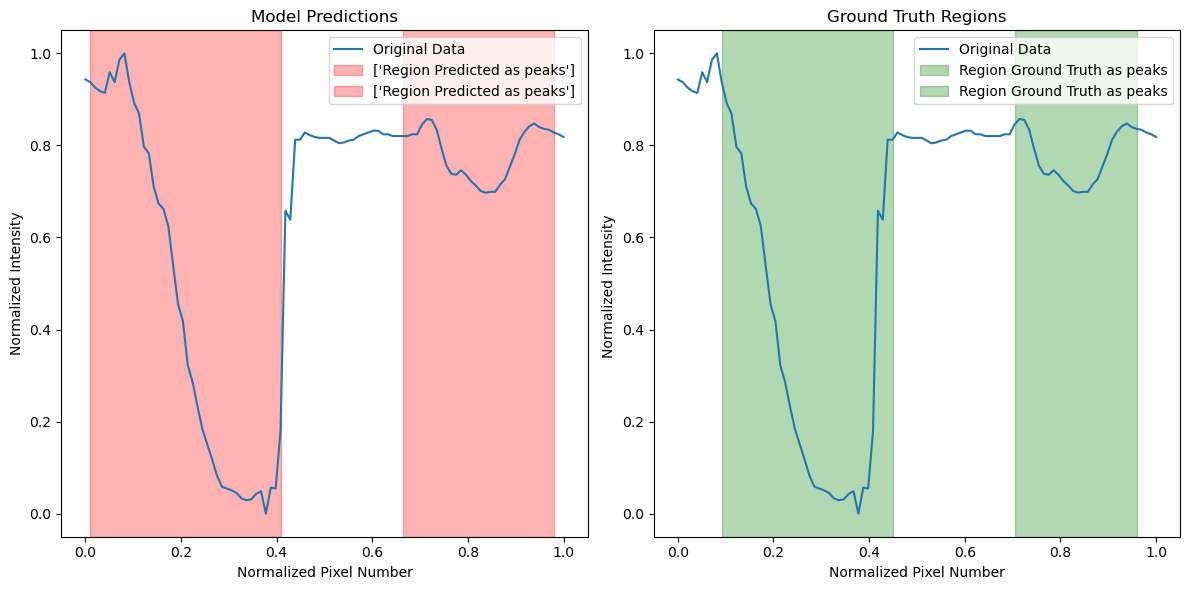

Accuracy: 0.82
Precision: 0.81
Recall (TP/(TP+FN)): 0.94
F1 Score (harmonic mean of precision and recall): 0.87
53-0-5_jpg.rf.e14f6c229612c73f08eb61a0edc14360.jpg.txt_labeled.txt
5/5 [==============================] - 0s 525us/step


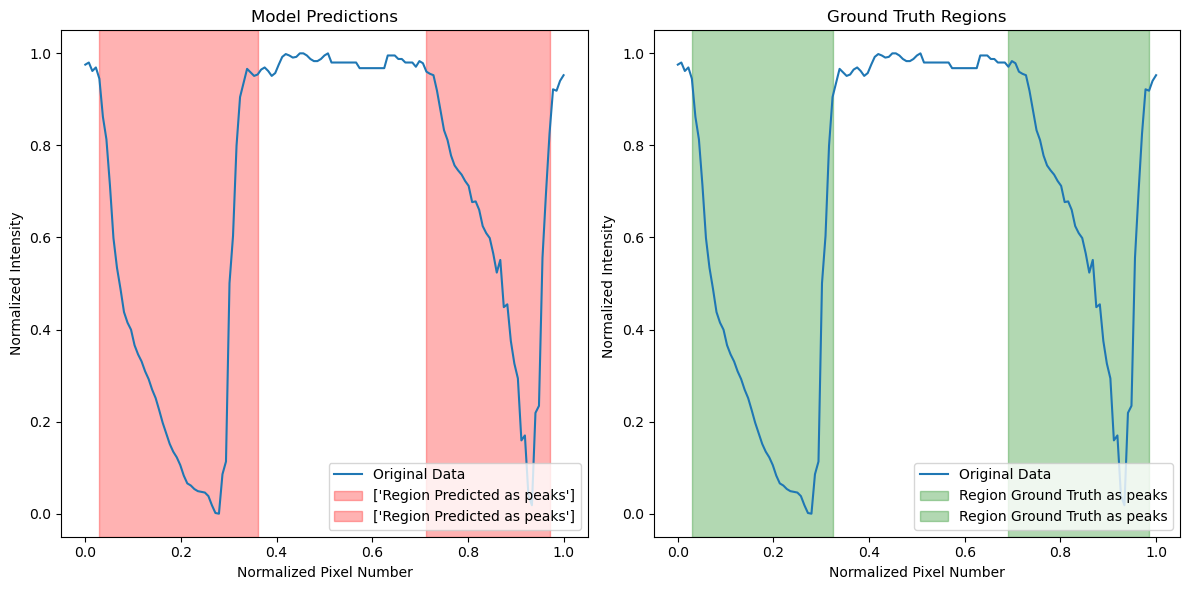

Accuracy: 0.93
Precision: 0.94
Recall (TP/(TP+FN)): 0.94
F1 Score (harmonic mean of precision and recall): 0.94
39-0-05_jpg.rf.bf3b03a864e1388fc6fbc3541d9662f6.jpg.txt_labeled.txt
4/4 [==============================] - 0s 584us/step


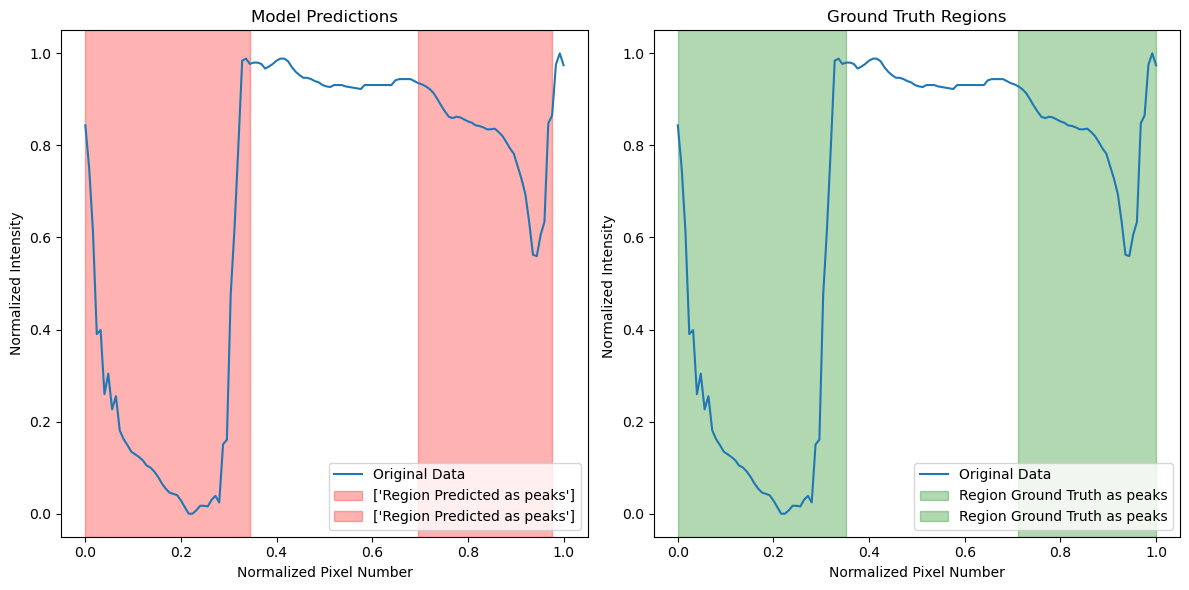

Accuracy: 0.95
Precision: 0.97
Recall (TP/(TP+FN)): 0.95
F1 Score (harmonic mean of precision and recall): 0.96
50-10_jpg.rf.bd3a3568719b4b190fa8d7e60f4aa9bd.jpg.txt_labeled.txt
4/4 [==============================] - 0s 733us/step


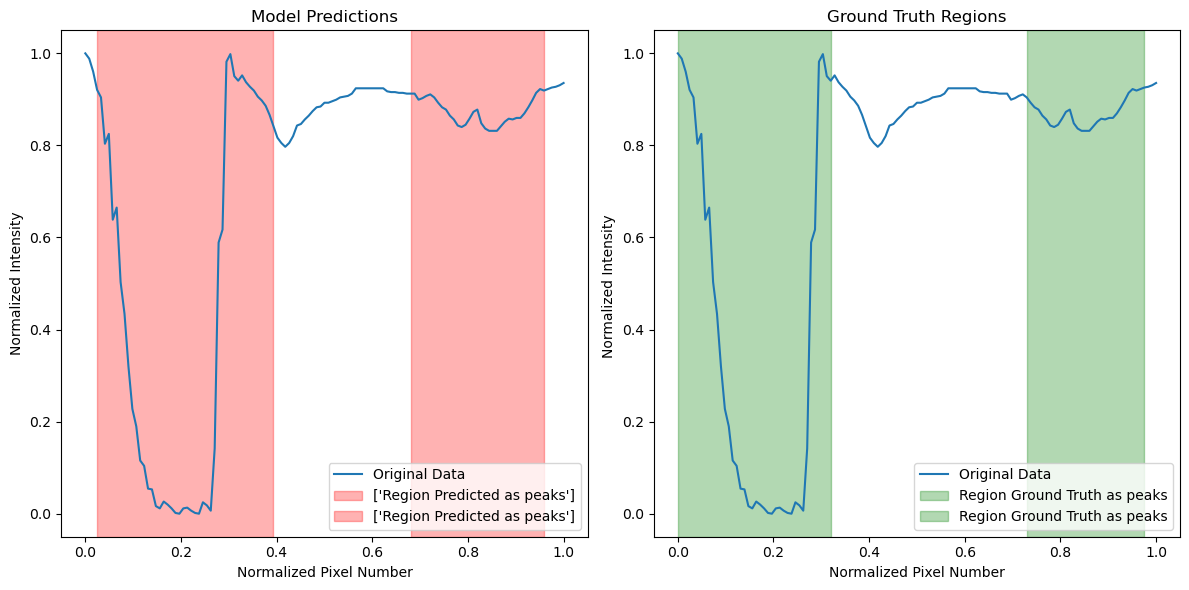

Accuracy: 0.84
Precision: 0.81
Recall (TP/(TP+FN)): 0.93
F1 Score (harmonic mean of precision and recall): 0.87
52-0-2_jpg.rf.24d6c524d708eff6584fbce4c0669d1f.jpg.txt_labeled.txt
4/4 [==============================] - 0s 622us/step


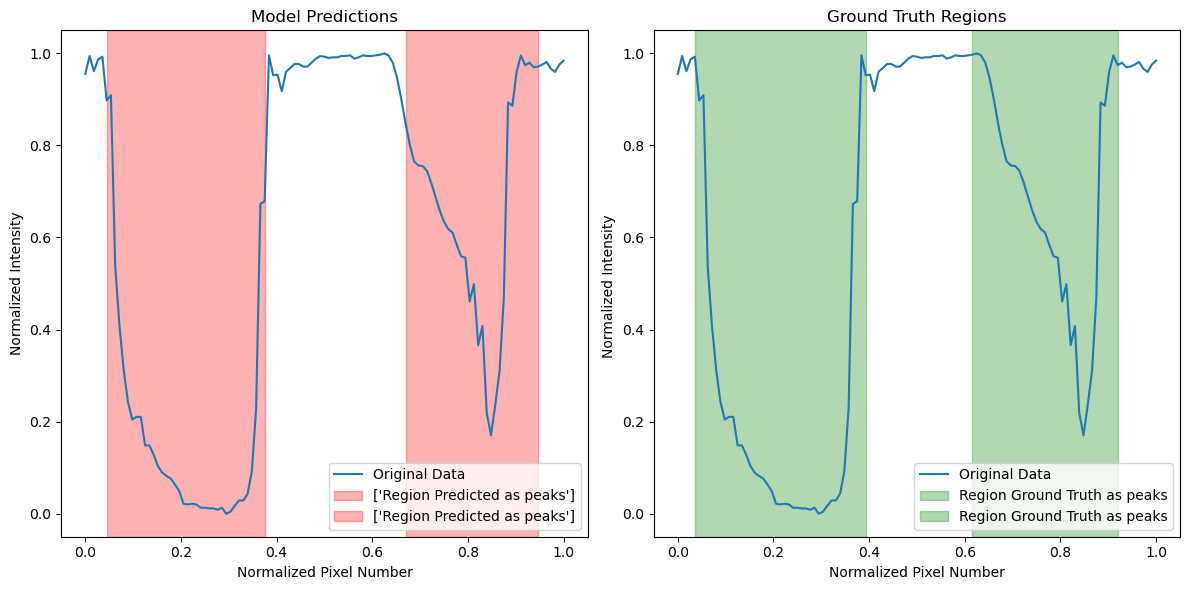

Accuracy: 0.89
Precision: 0.96
Recall (TP/(TP+FN)): 0.88
F1 Score (harmonic mean of precision and recall): 0.92
46-100_jpg.rf.4f413936cda1c19e0d91e0207e1c5cd5.jpg.txt_labeled.txt
4/4 [==============================] - 0s 653us/step


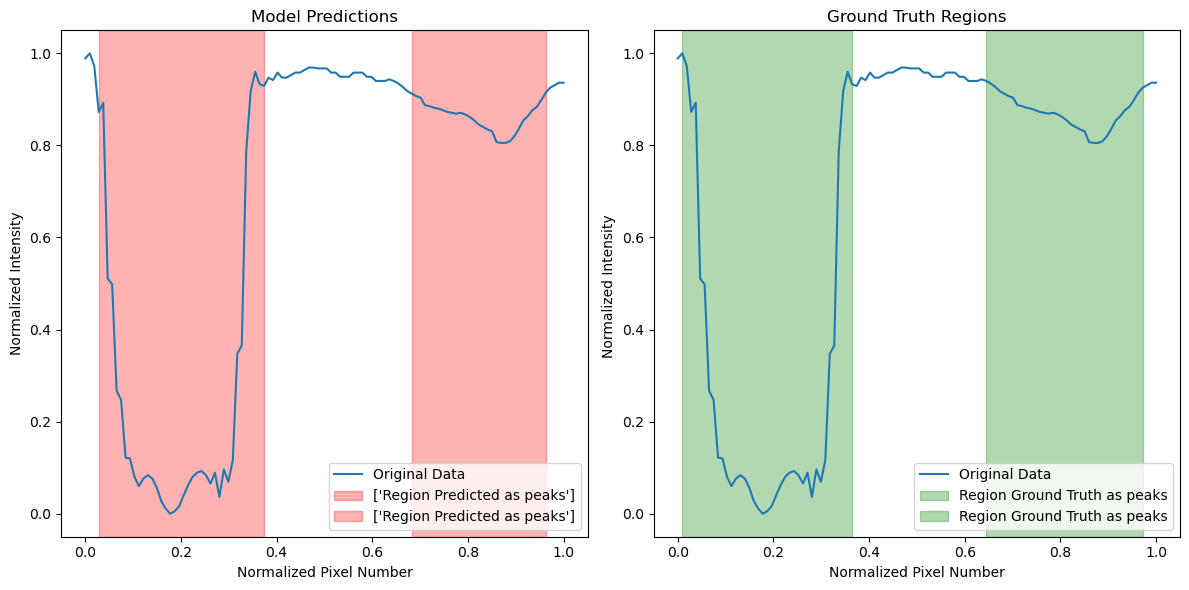

Accuracy: 0.93
Precision: 0.99
Recall (TP/(TP+FN)): 0.91
F1 Score (harmonic mean of precision and recall): 0.94
53-0-05_jpg.rf.88d9078144f3d6bb2fda0d98175cf1cc.jpg.txt_labeled.txt
5/5 [==============================] - 0s 547us/step


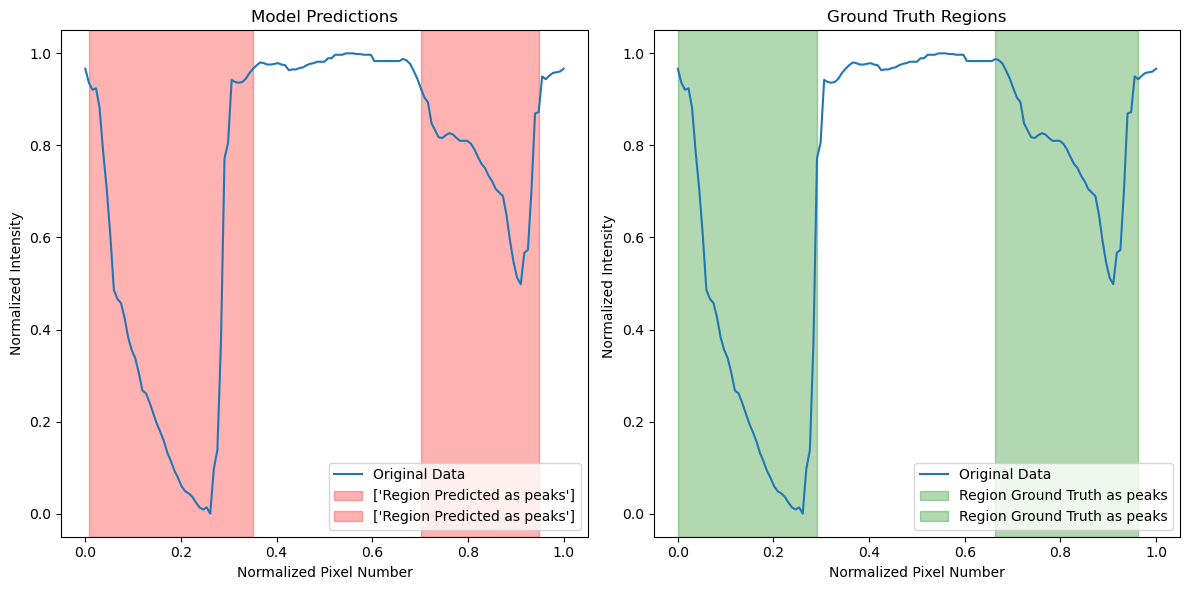

Accuracy: 0.88
Precision: 0.90
Recall (TP/(TP+FN)): 0.90
F1 Score (harmonic mean of precision and recall): 0.90
61-15_jpg.rf.78a966dc2d2b2514dfc01f39bcfcf0ff.jpg.txt_labeled.txt
4/4 [==============================] - 0s 683us/step


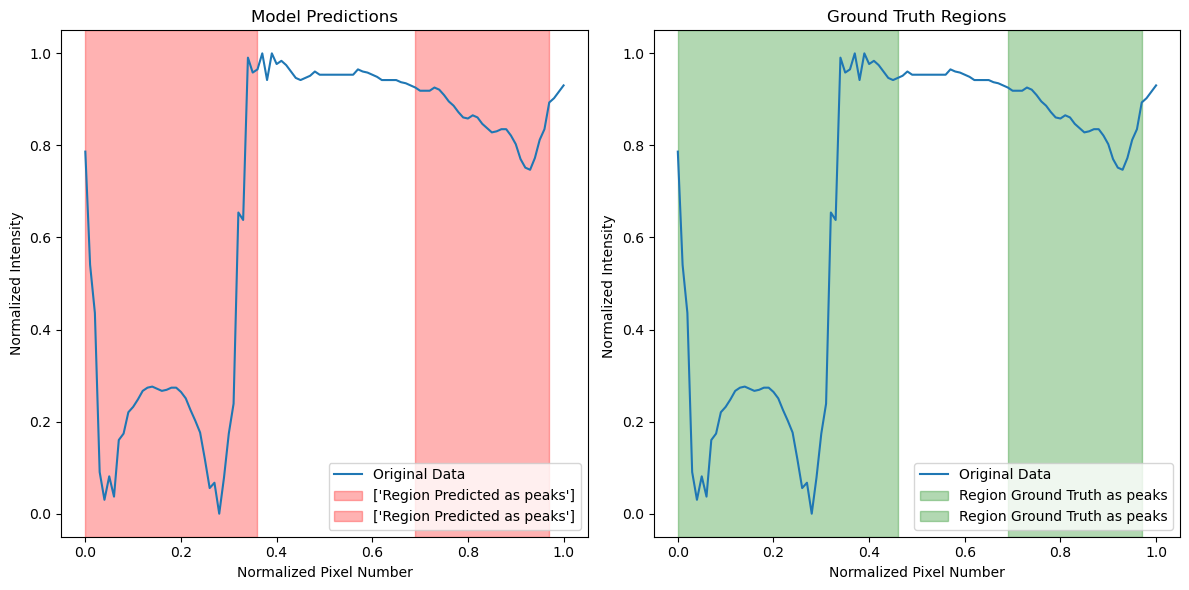

Accuracy: 0.90
Precision: 1.00
Recall (TP/(TP+FN)): 0.87
F1 Score (harmonic mean of precision and recall): 0.93
7-80_jpg.rf.77e2d82864baa35343000e7d91cd8f9b.jpg.txt_labeled.txt
4/4 [==============================] - 0s 819us/step


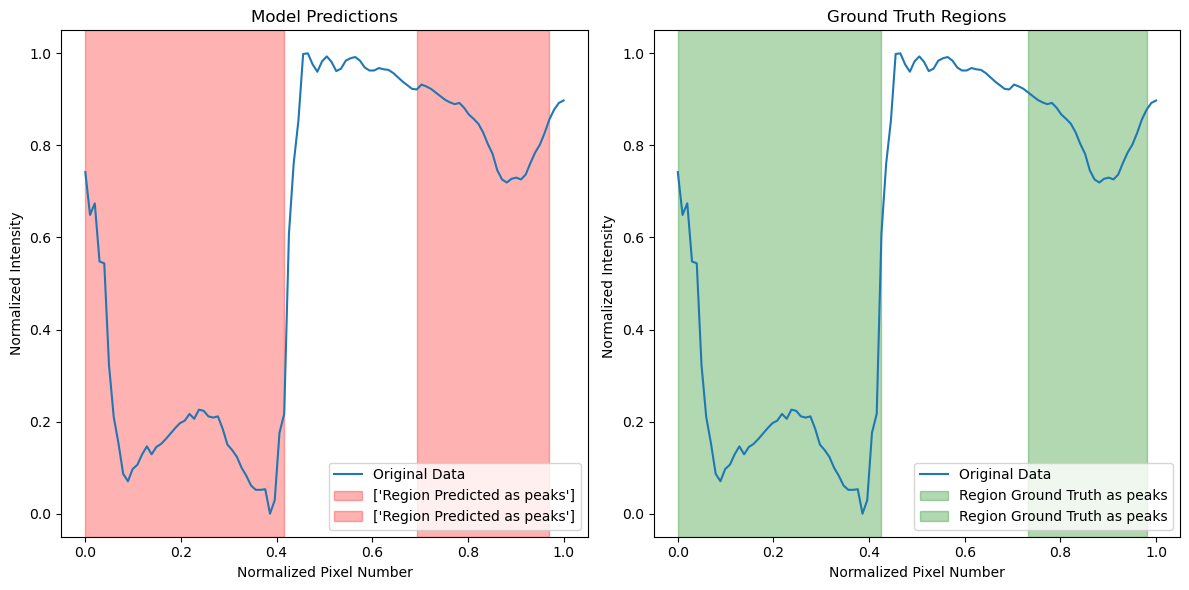

Accuracy: 0.94
Precision: 0.94
Recall (TP/(TP+FN)): 0.97
F1 Score (harmonic mean of precision and recall): 0.96
49-50-_jpg.rf.b9f049fc1064075120a664bbef7392bb.jpg.txt_labeled.txt
4/4 [==============================] - 0s 732us/step


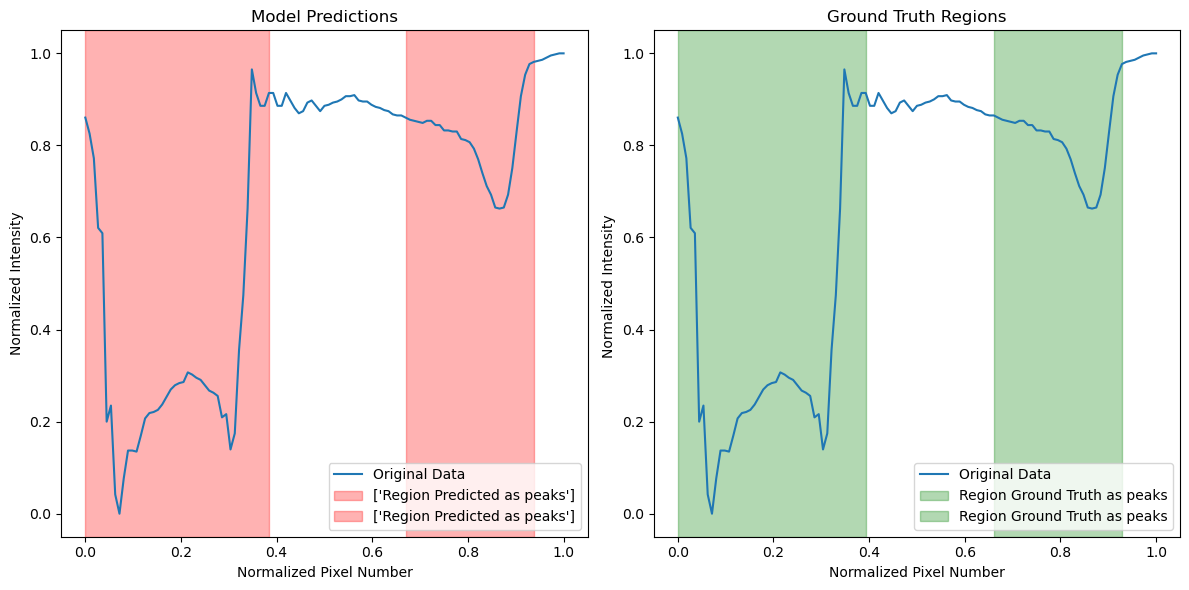

Accuracy: 0.97
Precision: 0.99
Recall (TP/(TP+FN)): 0.97
F1 Score (harmonic mean of precision and recall): 0.98
22-10-_jpg.rf.4ef5ad0105b3d03ce1d98746f5fe3f24.jpg.txt_labeled.txt
4/4 [==============================] - 0s 881us/step


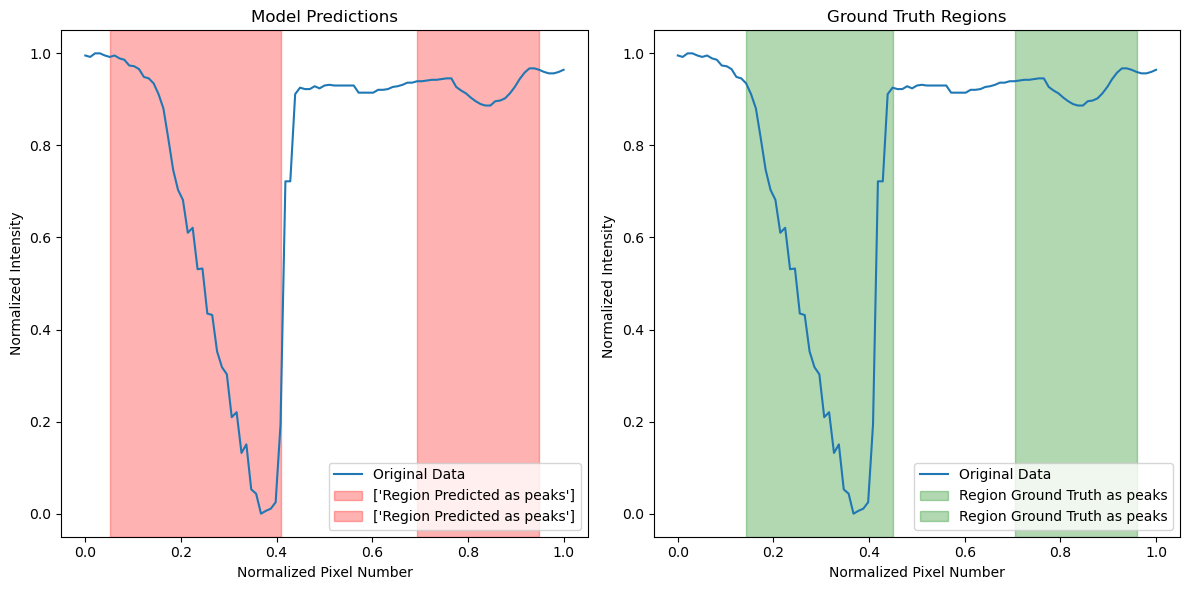

Accuracy: 0.85
Precision: 0.84
Recall (TP/(TP+FN)): 0.91
F1 Score (harmonic mean of precision and recall): 0.87
48-0-5_jpg.rf.80b309006b3a2bd75a68973040dcfd6b.jpg.txt_labeled.txt
4/4 [==============================] - 0s 634us/step


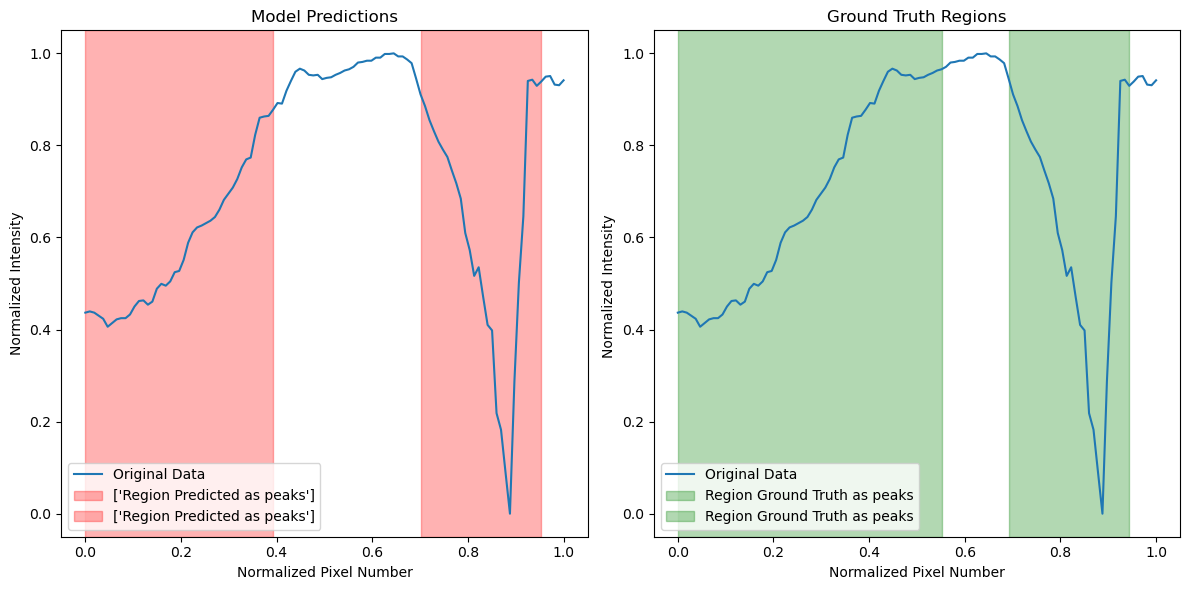

Accuracy: 0.82
Precision: 0.99
Recall (TP/(TP+FN)): 0.80
F1 Score (harmonic mean of precision and recall): 0.88
29-1000-_jpg.rf.615d8eaff380813d05d631b2f4b46324.jpg.txt_labeled.txt
4/4 [==============================] - 0s 551us/step


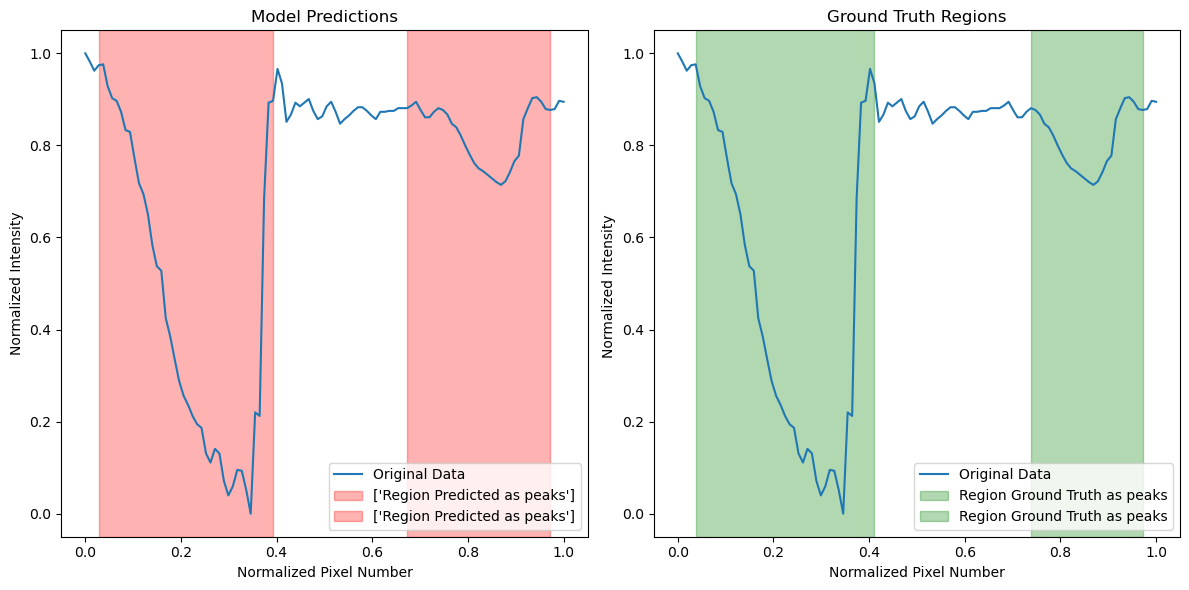

Accuracy: 0.91
Precision: 0.89
Recall (TP/(TP+FN)): 0.97
F1 Score (harmonic mean of precision and recall): 0.93
45-250-_jpg.rf.a8f9aa659549cea00bfe69b8de3135fc.jpg.txt_labeled.txt
3/3 [==============================] - 0s 1ms/step


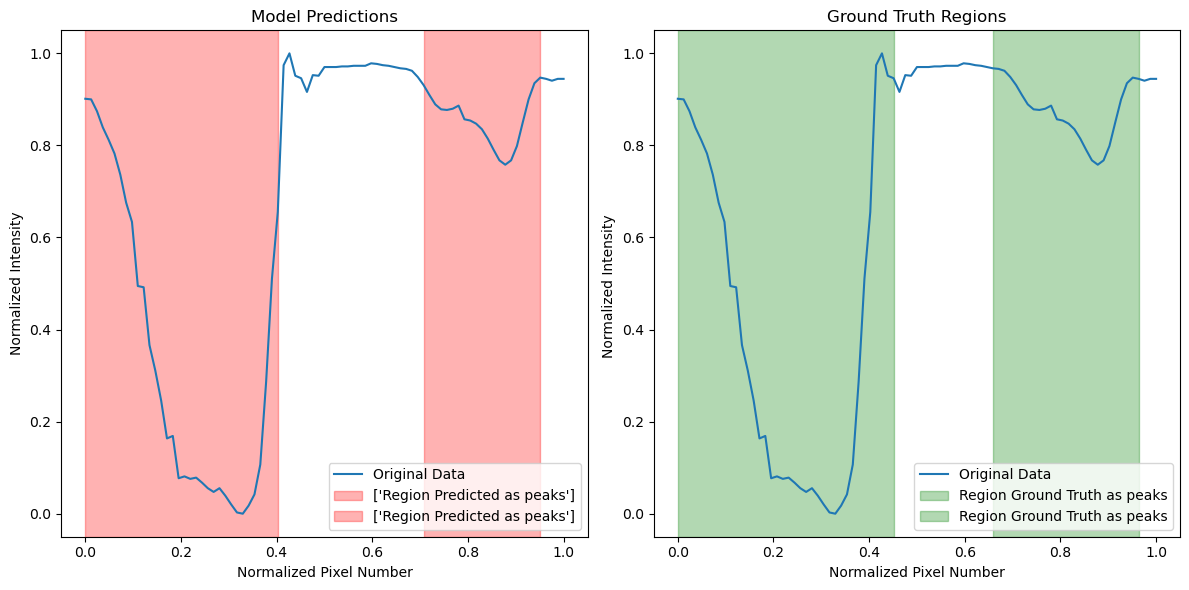

Accuracy: 0.89
Precision: 1.00
Recall (TP/(TP+FN)): 0.86
F1 Score (harmonic mean of precision and recall): 0.92
15-50_jpg.rf.fa8b24cfef560646fbb6d554398f59da.jpg.txt_labeled.txt
4/4 [==============================] - 0s 641us/step


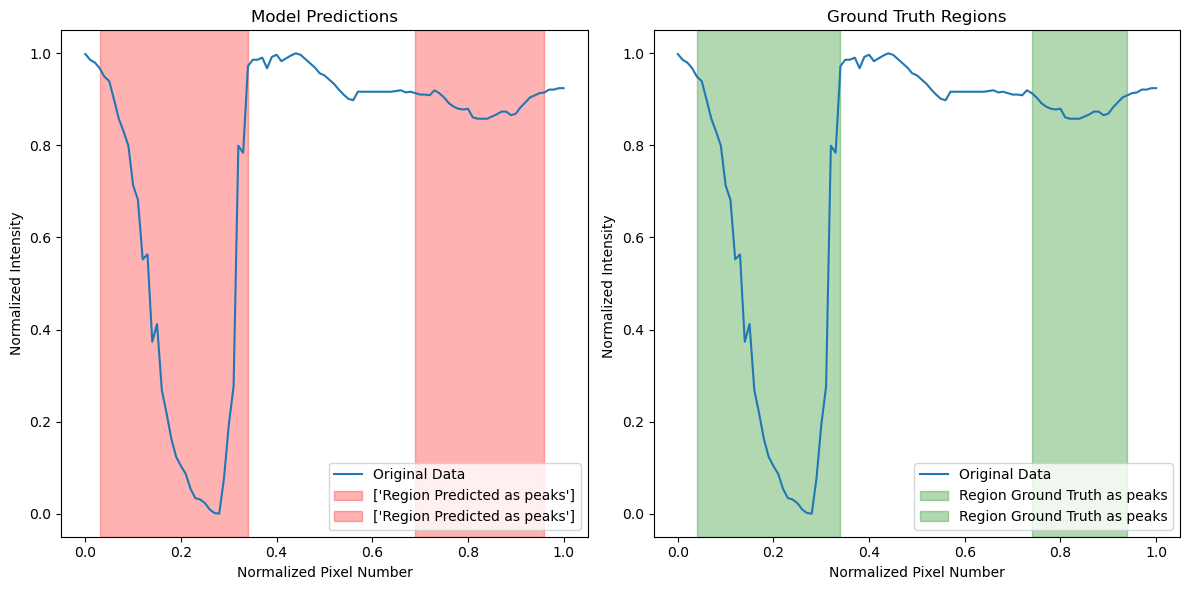

Accuracy: 0.92
Precision: 0.87
Recall (TP/(TP+FN)): 1.00
F1 Score (harmonic mean of precision and recall): 0.93
39-500_jpg.rf.cccf50e2958ddfaec9a8ea33ca01620a.jpg.txt_labeled.txt
4/4 [==============================] - 0s 588us/step


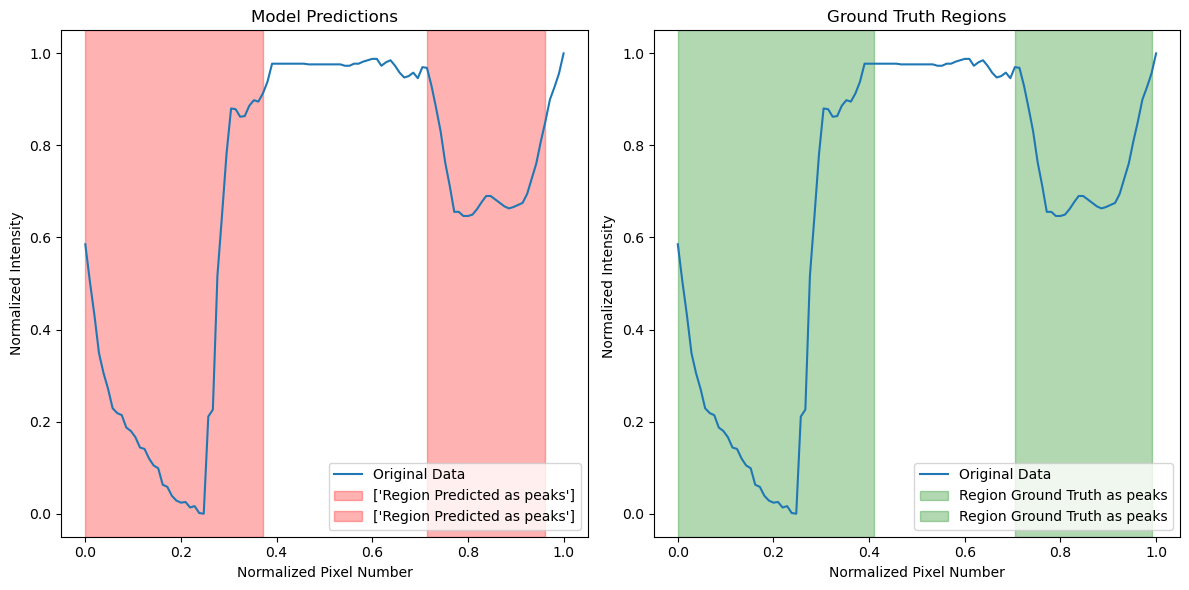

Accuracy: 0.92
Precision: 1.00
Recall (TP/(TP+FN)): 0.89
F1 Score (harmonic mean of precision and recall): 0.94
3-5_jpg.rf.f885827e4900dd3fb84fde3970ced626.jpg.txt_labeled.txt
4/4 [==============================] - 0s 607us/step


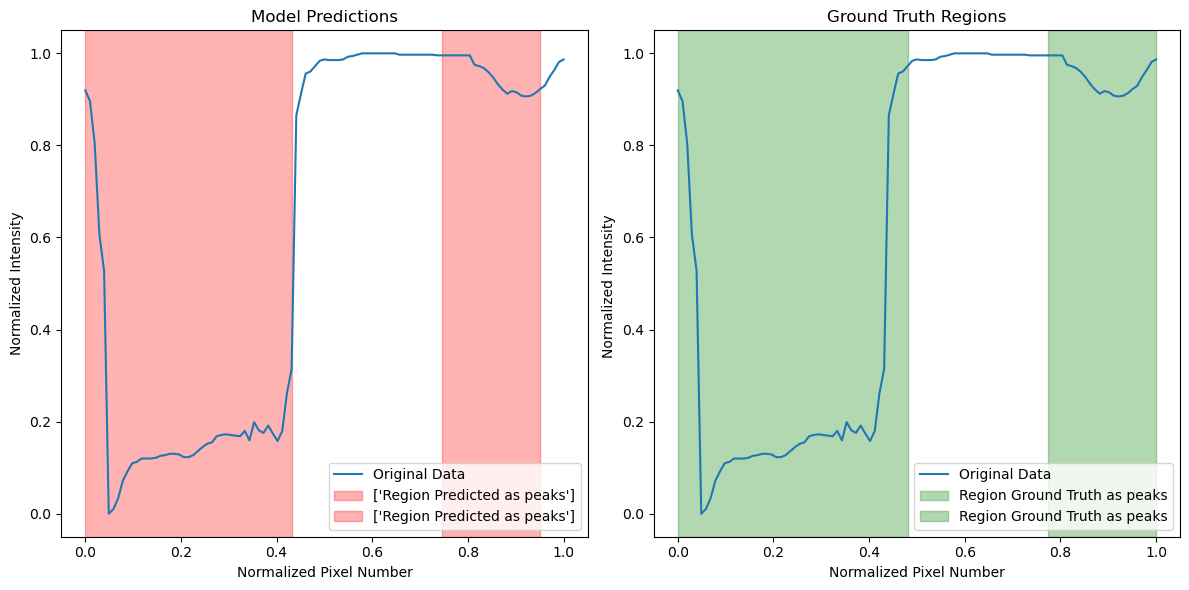

Accuracy: 0.87
Precision: 0.96
Recall (TP/(TP+FN)): 0.86
F1 Score (harmonic mean of precision and recall): 0.91
49-15_jpg.rf.cfc5c48a026a960b951384dc765c02d8.jpg.txt_labeled.txt
4/4 [==============================] - 0s 617us/step


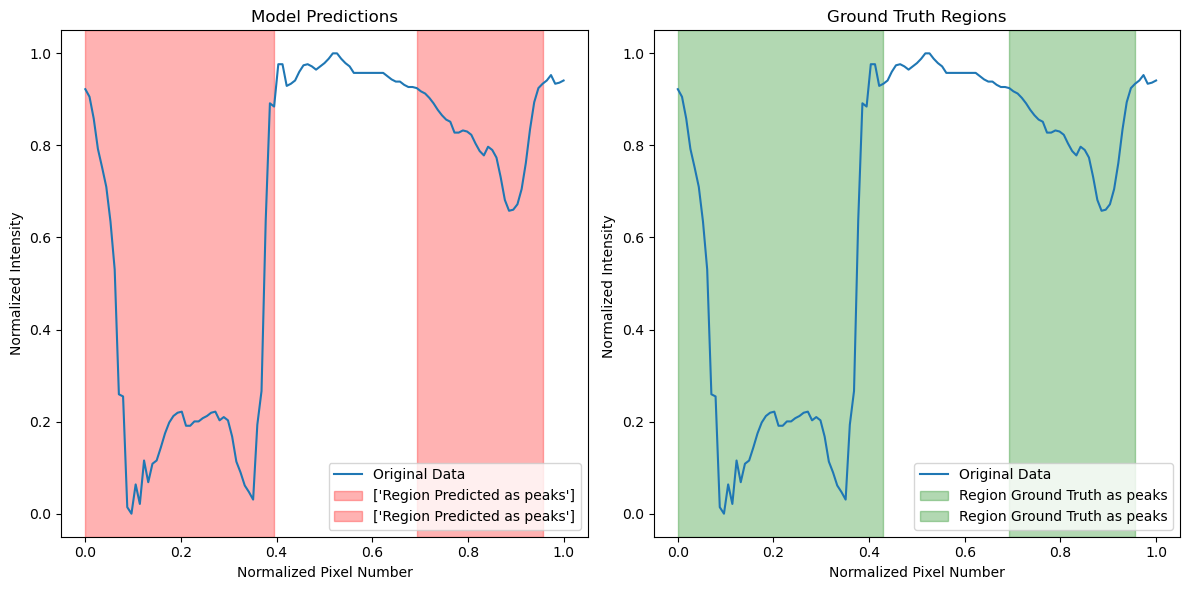

Accuracy: 0.97
Precision: 1.00
Recall (TP/(TP+FN)): 0.95
F1 Score (harmonic mean of precision and recall): 0.97
49-5-_jpg.rf.e9d3e8f2c1a3ebc290440c92e07b51be.jpg.txt_labeled.txt
4/4 [==============================] - 0s 587us/step


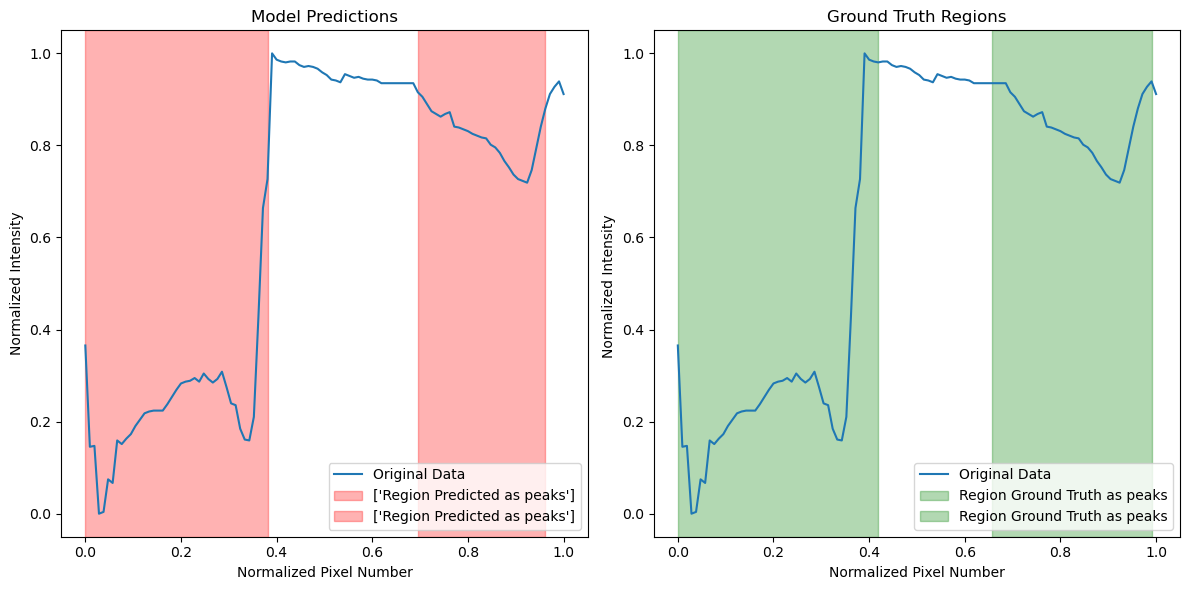

Accuracy: 0.90
Precision: 1.00
Recall (TP/(TP+FN)): 0.86
F1 Score (harmonic mean of precision and recall): 0.93
14-5000_jpg.rf.9fa7d4a937a1db4ab03dc1ce3a7b603c.jpg.txt_labeled.txt
3/3 [==============================] - 0s 687us/step


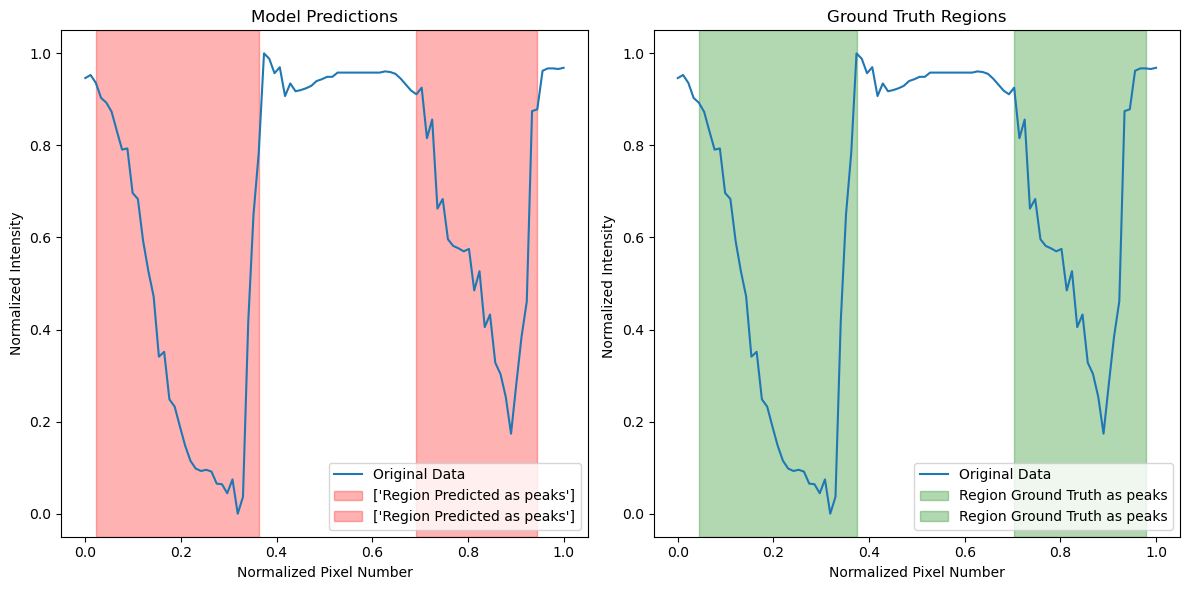

Accuracy: 0.92
Precision: 0.95
Recall (TP/(TP+FN)): 0.93
F1 Score (harmonic mean of precision and recall): 0.94
22-500_jpg.rf.066198a40b167c67d5dac23a0fcb89e1.jpg.txt_labeled.txt
3/3 [==============================] - 0s 1ms/step


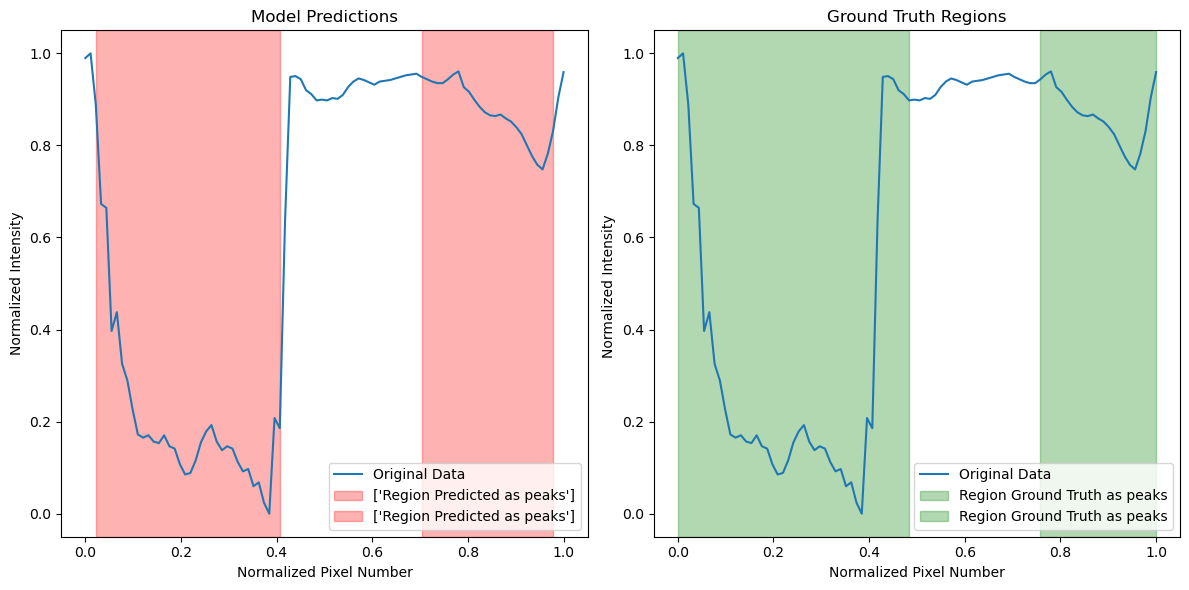

Accuracy: 0.83
Precision: 0.92
Recall (TP/(TP+FN)): 0.84
F1 Score (harmonic mean of precision and recall): 0.88
52-0_jpg.rf.10a58b786f62c561191136b8d1f2537a.jpg.txt_labeled.txt
4/4 [==============================] - 0s 768us/step


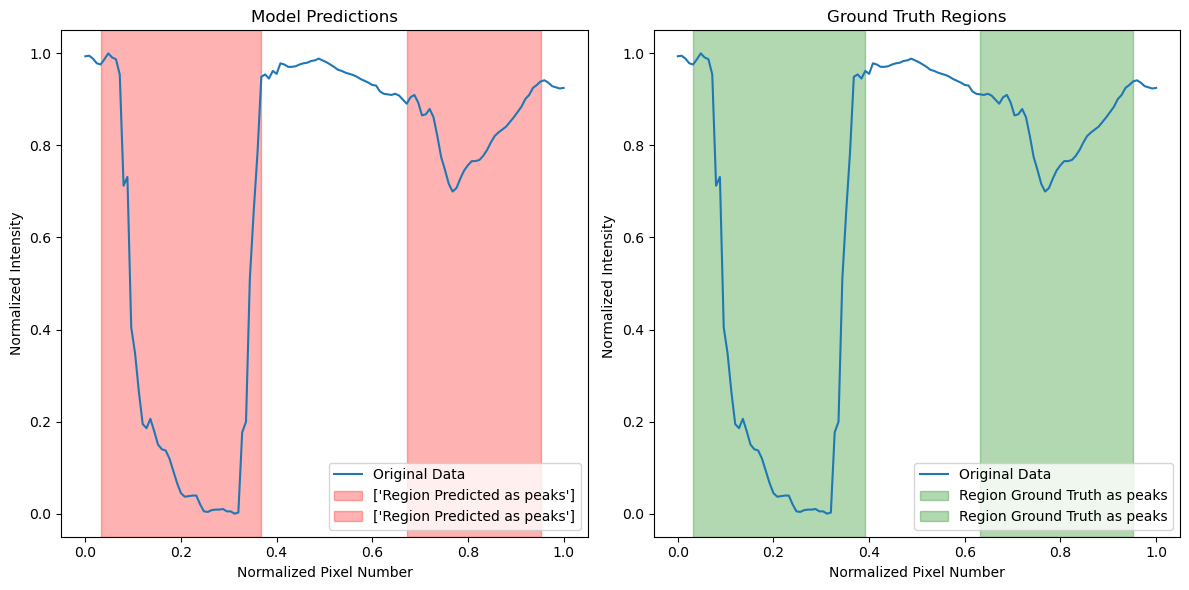

Accuracy: 0.94
Precision: 1.00
Recall (TP/(TP+FN)): 0.91
F1 Score (harmonic mean of precision and recall): 0.95
49-250-_jpg.rf.0d8a731ce6ce464882369a8fe0b3311e.jpg.txt_labeled.txt
4/4 [==============================] - 0s 792us/step


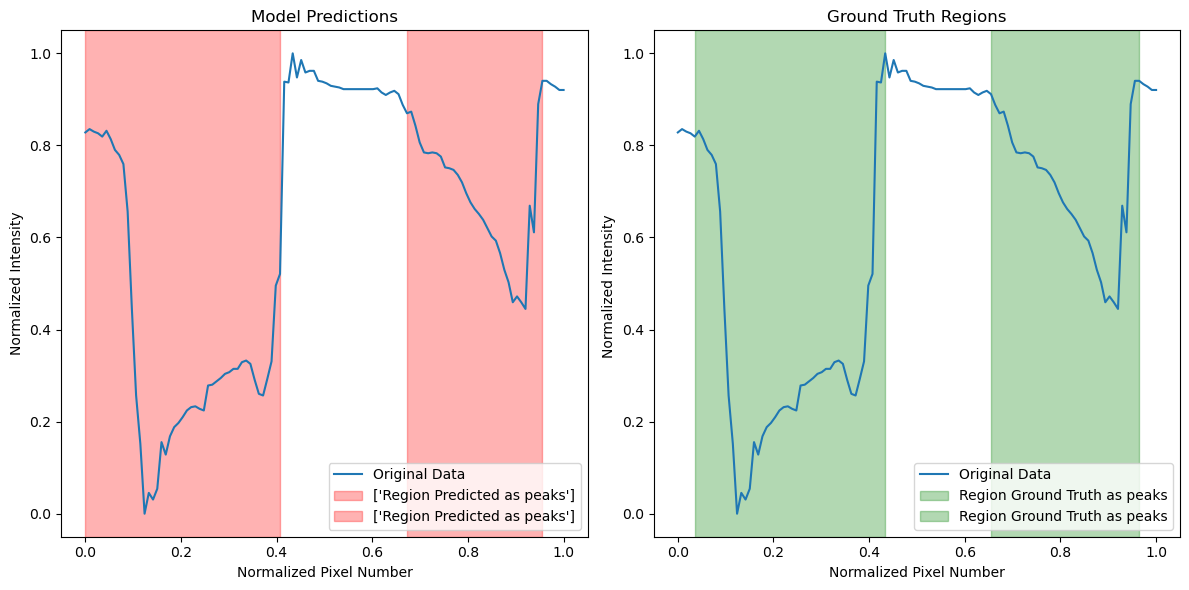

Accuracy: 0.91
Precision: 0.95
Recall (TP/(TP+FN)): 0.93
F1 Score (harmonic mean of precision and recall): 0.94
20-100_jpg.rf.cc0749329f583f77044aa62e83482f53.jpg.txt_labeled.txt
4/4 [==============================] - 0s 604us/step


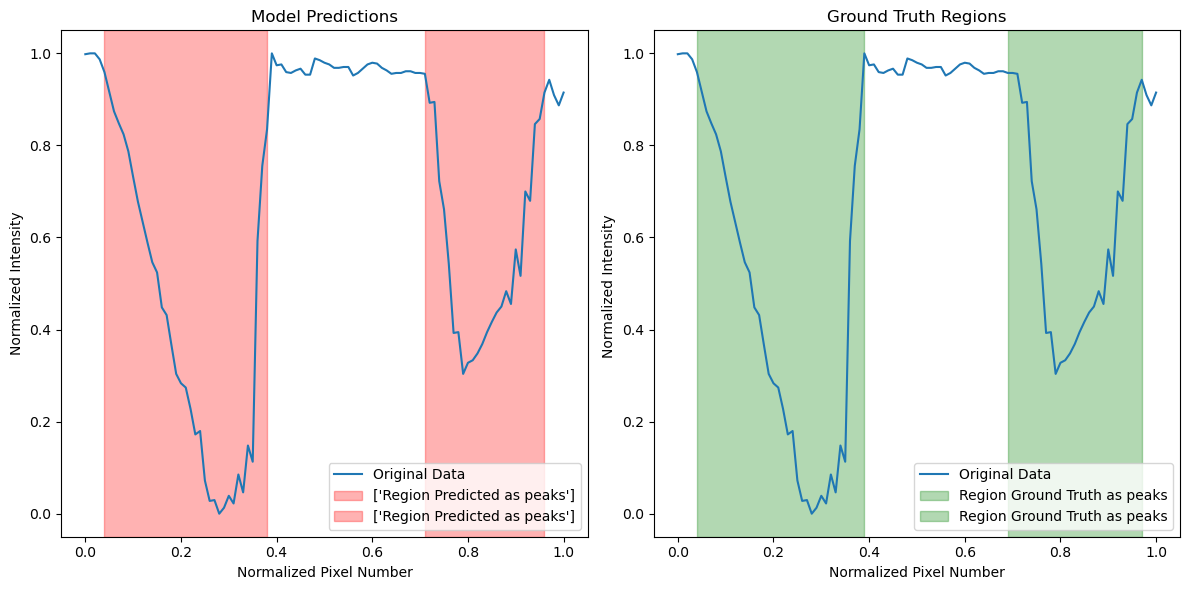

Accuracy: 0.96
Precision: 1.00
Recall (TP/(TP+FN)): 0.94
F1 Score (harmonic mean of precision and recall): 0.97
12-25-_jpg.rf.afcb601c7caf7ed55c2d70ba794acaff.jpg.txt_labeled.txt
4/4 [==============================] - 0s 625us/step


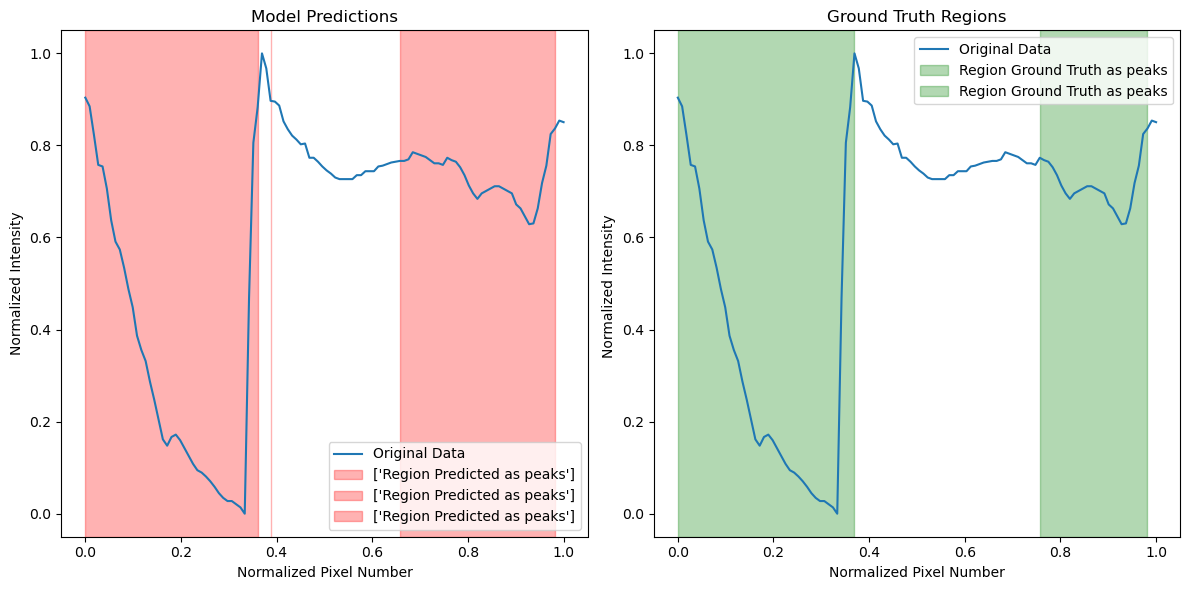

Accuracy: 0.88
Precision: 0.85
Recall (TP/(TP+FN)): 0.99
F1 Score (harmonic mean of precision and recall): 0.91
16-25_jpg.rf.ddaa972cb8ea20f7acdd6ff4c14576ab.jpg.txt_labeled.txt
4/4 [==============================] - 0s 697us/step


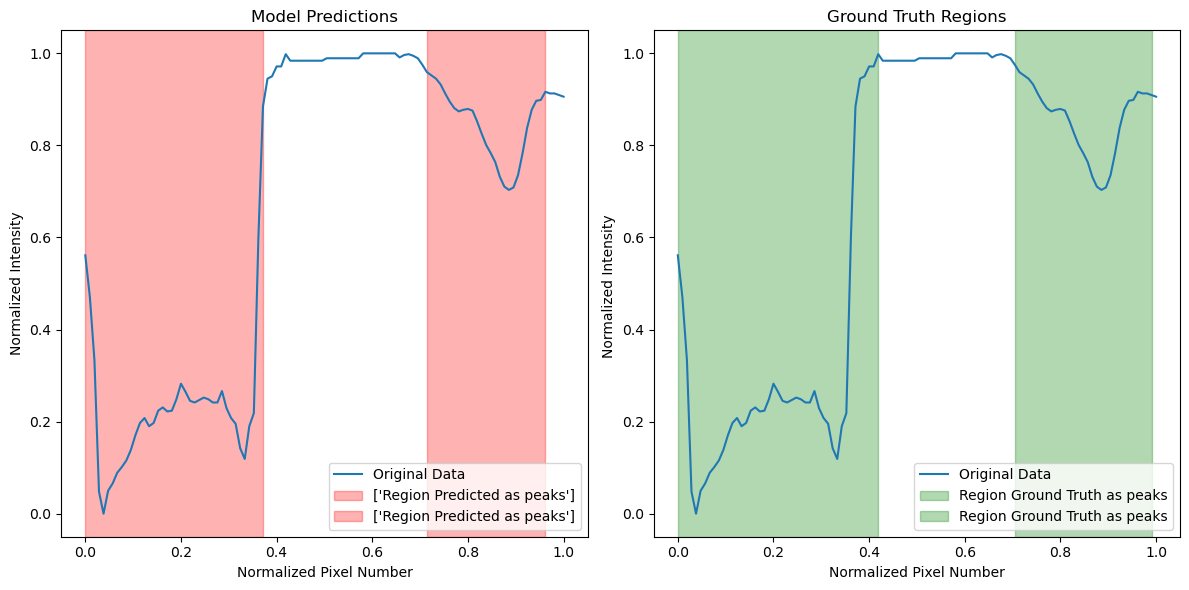

Accuracy: 0.92
Precision: 1.00
Recall (TP/(TP+FN)): 0.88
F1 Score (harmonic mean of precision and recall): 0.94
45-35-_jpg.rf.7b4acad0aaa5719107e14c4862dcc201.jpg.txt_labeled.txt
4/4 [==============================] - 0s 546us/step


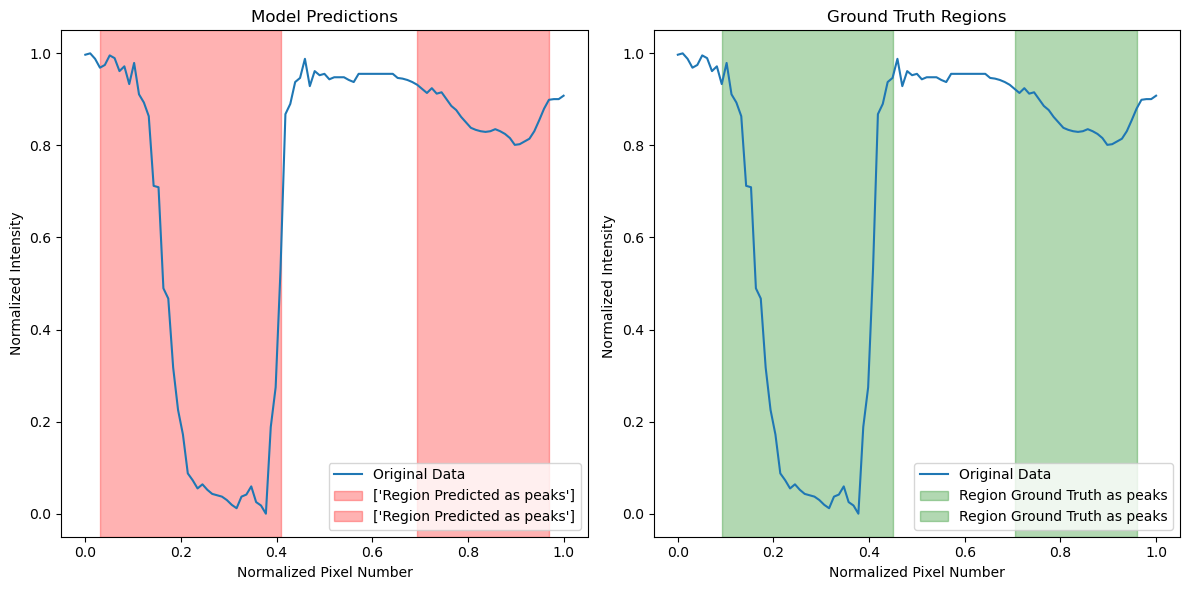

Accuracy: 0.88
Precision: 0.88
Recall (TP/(TP+FN)): 0.94
F1 Score (harmonic mean of precision and recall): 0.91
2-25_jpg.rf.af292b00176e9835e958c0d81b99e836.jpg.txt_labeled.txt
3/3 [==============================] - 0s 634us/step


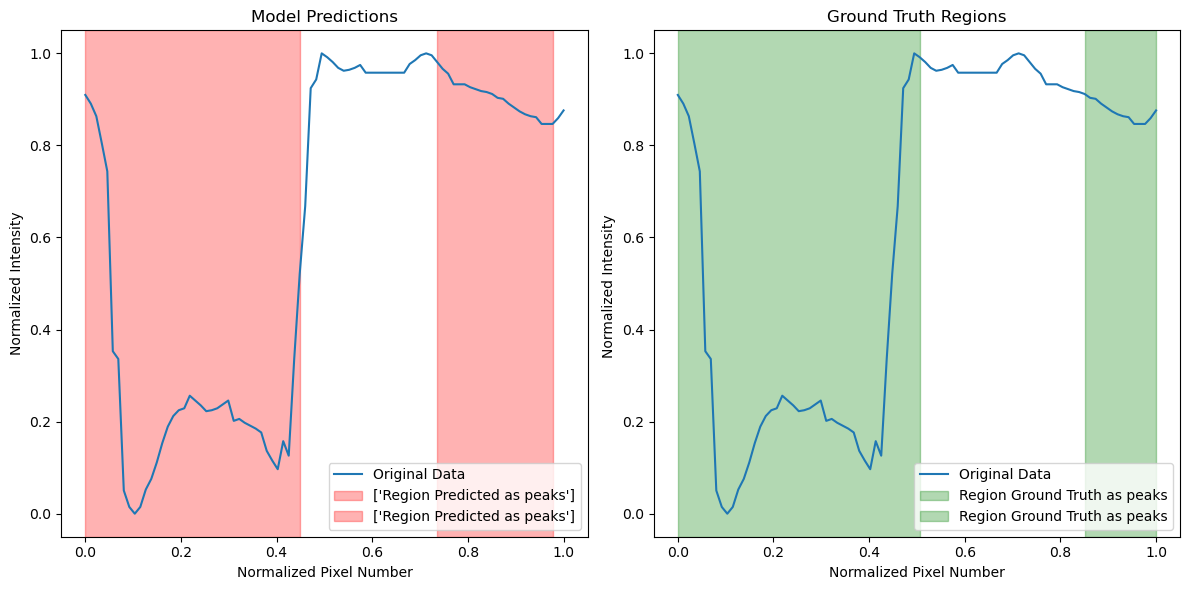

Accuracy: 0.81
Precision: 0.84
Recall (TP/(TP+FN)): 0.88
F1 Score (harmonic mean of precision and recall): 0.86
17-80_jpg.rf.9d910a305339837b0358ffa2bdd28160.jpg.txt_labeled.txt
3/3 [==============================] - 0s 1ms/step


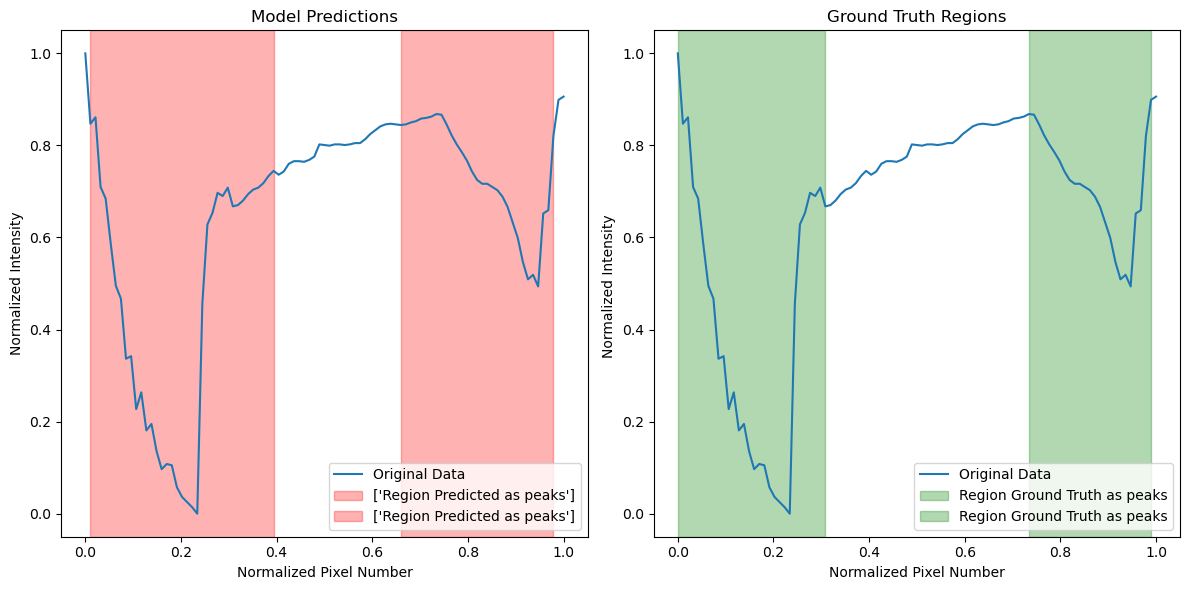

Accuracy: 0.82
Precision: 0.78
Recall (TP/(TP+FN)): 0.96
F1 Score (harmonic mean of precision and recall): 0.86
10-25_jpg.rf.f7415a0062aead7f15463376f4601aca.jpg.txt_labeled.txt
4/4 [==============================] - 0s 597us/step


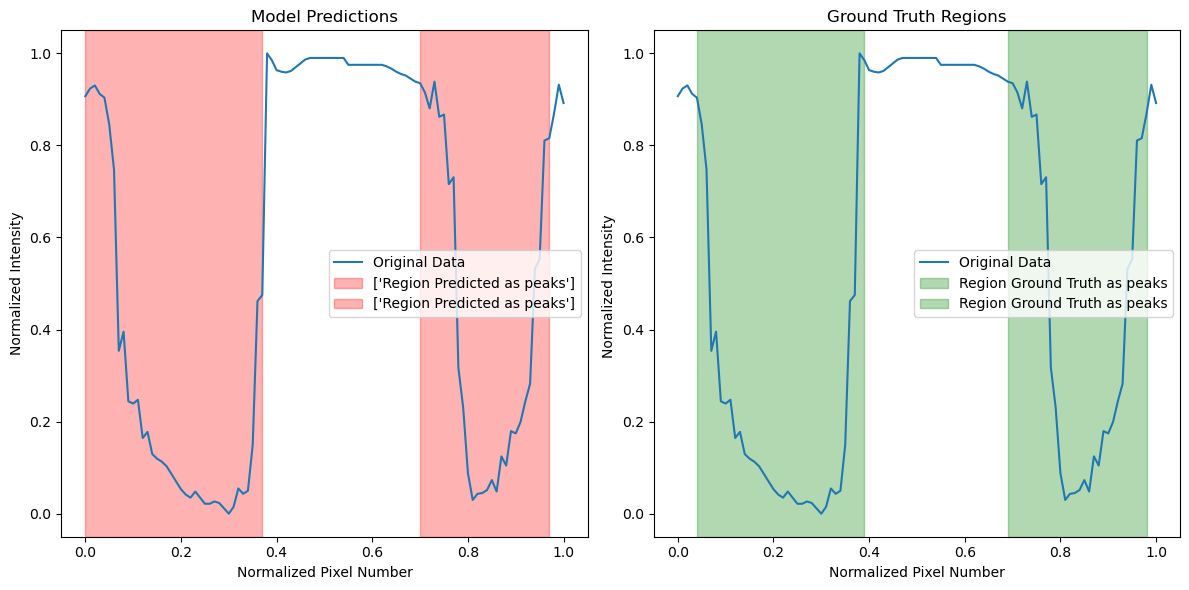

Accuracy: 0.92
Precision: 0.94
Recall (TP/(TP+FN)): 0.94
F1 Score (harmonic mean of precision and recall): 0.94
11-500_jpg.rf.d103a65b0f5a0866bce3770e18d27032.jpg.txt_labeled.txt
4/4 [==============================] - 0s 766us/step


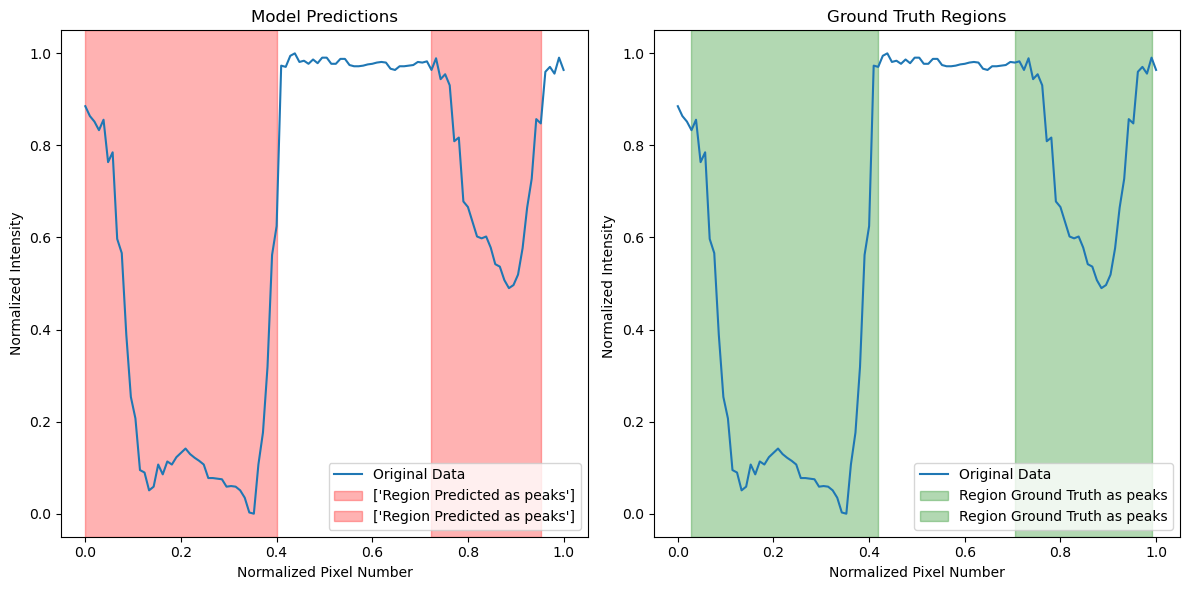

Accuracy: 0.90
Precision: 0.96
Recall (TP/(TP+FN)): 0.89
F1 Score (harmonic mean of precision and recall): 0.92
20-5_jpg.rf.4aa5b13461d7cdf2e3249bc808359cb1.jpg.txt_labeled.txt
4/4 [==============================] - 0s 553us/step


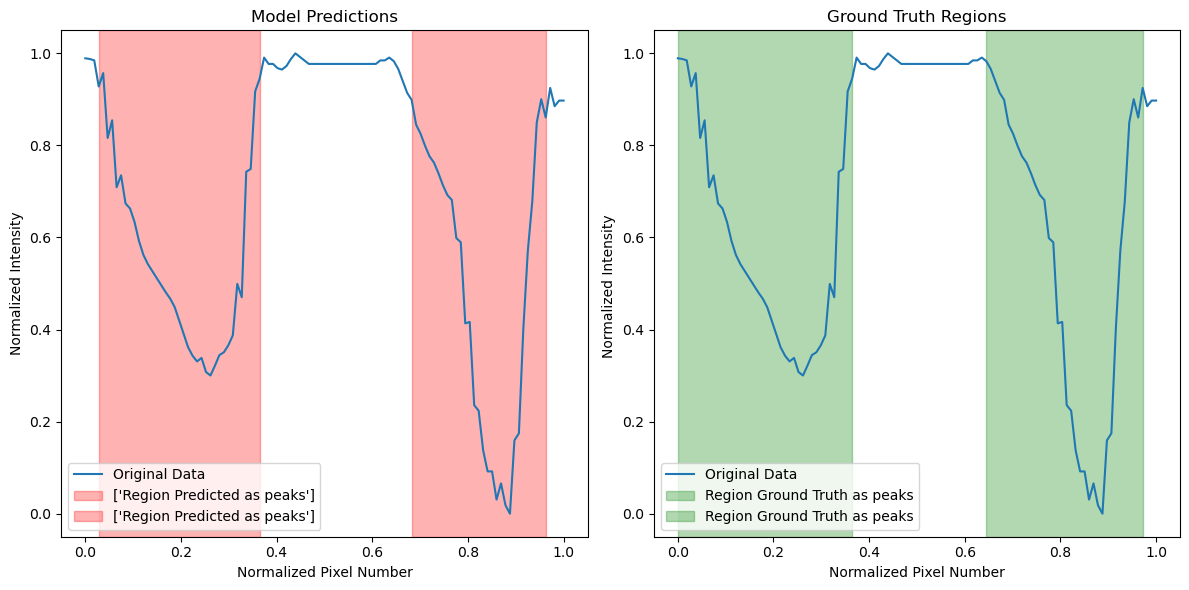

Accuracy: 0.93
Precision: 1.00
Recall (TP/(TP+FN)): 0.89
F1 Score (harmonic mean of precision and recall): 0.94
60-25-_jpg.rf.76117ae8f5239df9ad474e9d7f48659d.jpg.txt_labeled.txt
4/4 [==============================] - 0s 585us/step


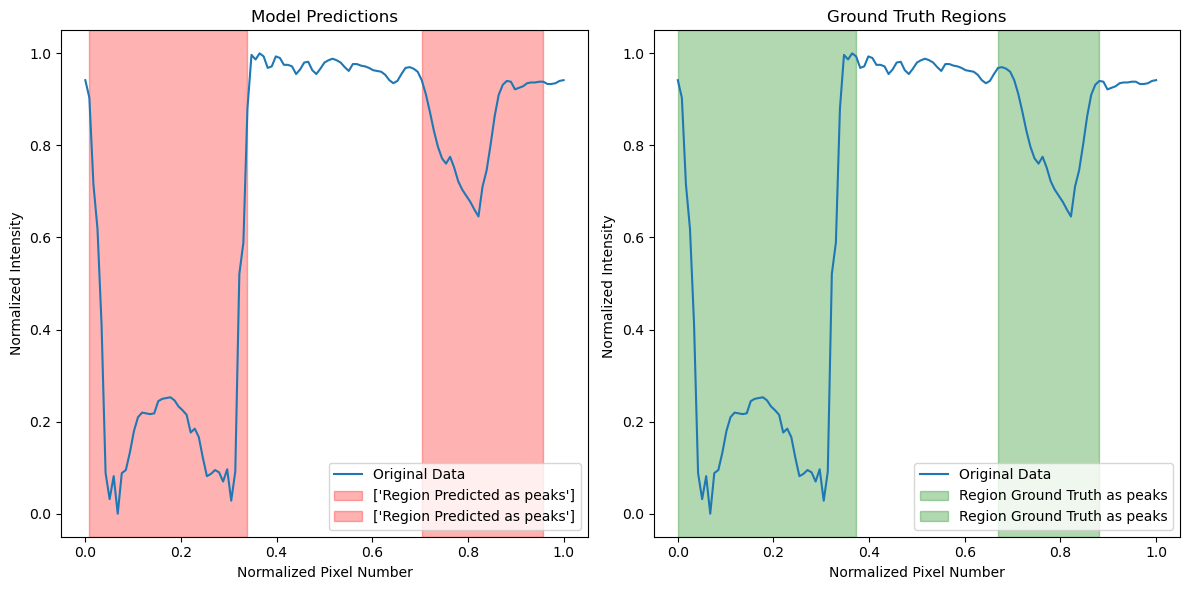

Accuracy: 0.85
Precision: 0.87
Recall (TP/(TP+FN)): 0.87
F1 Score (harmonic mean of precision and recall): 0.87
46-500-_jpg.rf.9eca0bc334e0d8013f63aca2422f9db0.jpg.txt_labeled.txt
4/4 [==============================] - 0s 666us/step


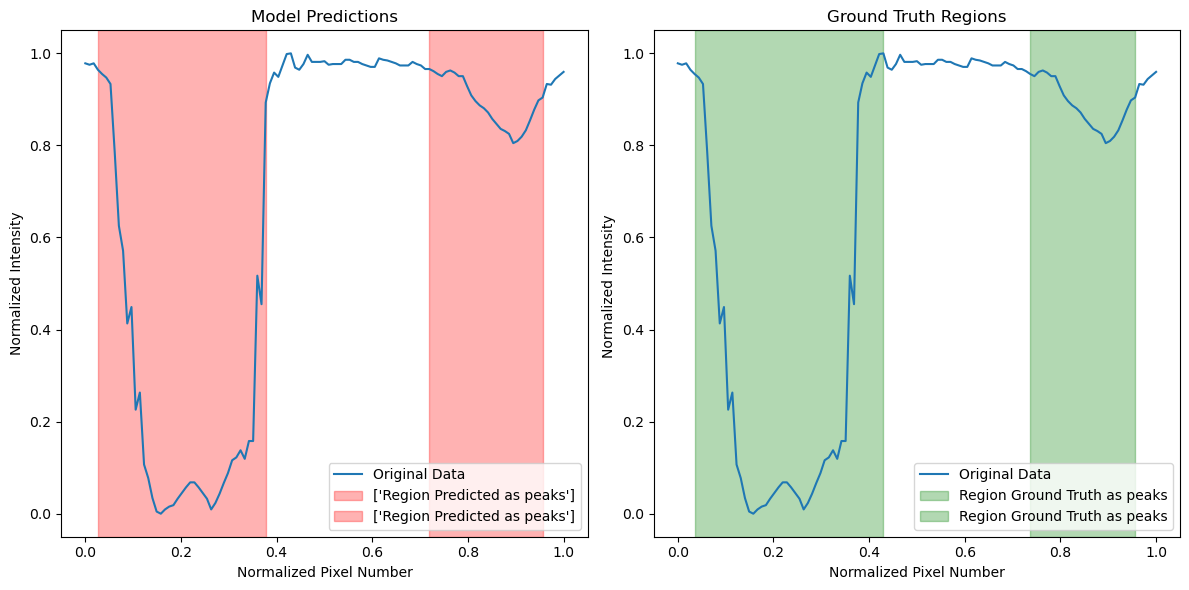

Accuracy: 0.92
Precision: 0.96
Recall (TP/(TP+FN)): 0.92
F1 Score (harmonic mean of precision and recall): 0.94
11-5_jpg.rf.d08899efc707d65f06055c0d3bba1ae9.jpg.txt_labeled.txt
4/4 [==============================] - 0s 561us/step


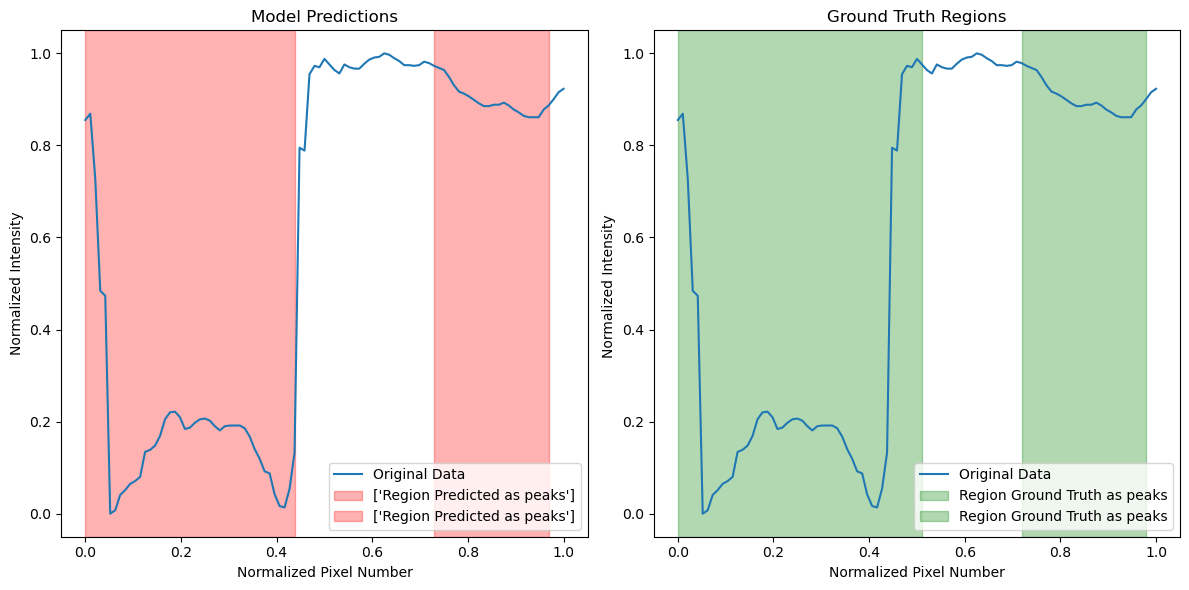

Accuracy: 0.91
Precision: 1.00
Recall (TP/(TP+FN)): 0.88
F1 Score (harmonic mean of precision and recall): 0.94
12-10_jpg.rf.dacf2e4cc47c50690c3e323de67ed1af.jpg.txt_labeled.txt
4/4 [==============================] - 0s 656us/step


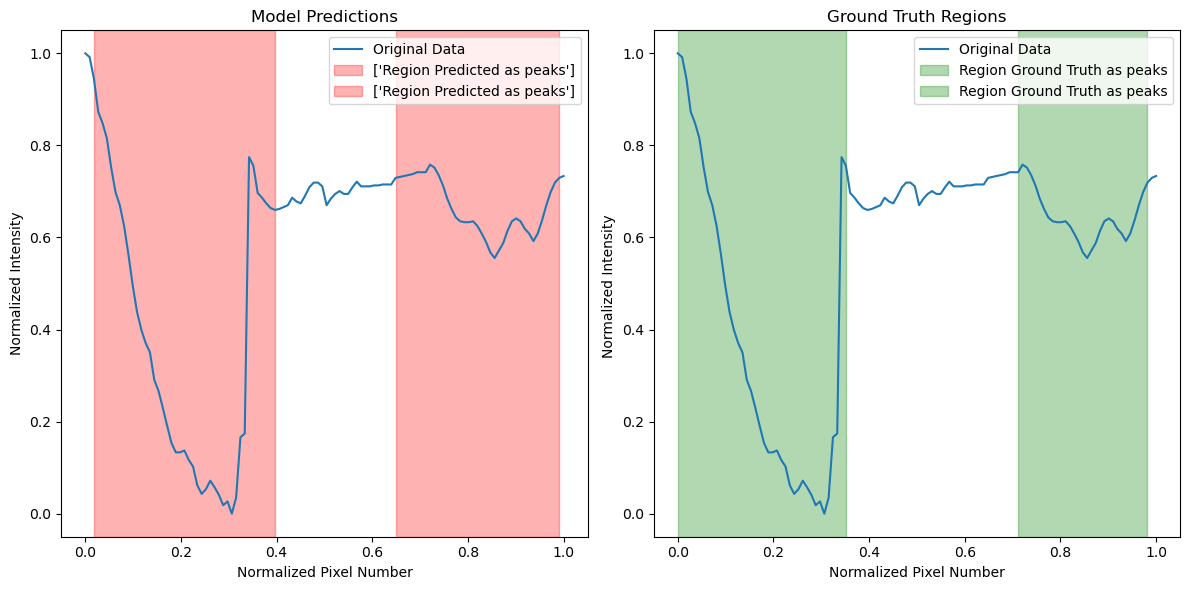

Accuracy: 0.87
Precision: 0.84
Recall (TP/(TP+FN)): 0.97
F1 Score (harmonic mean of precision and recall): 0.90
60-5_jpg.rf.11d070c7b1da3402e7b36f6d01b939db.jpg.txt_labeled.txt
4/4 [==============================] - 0s 620us/step


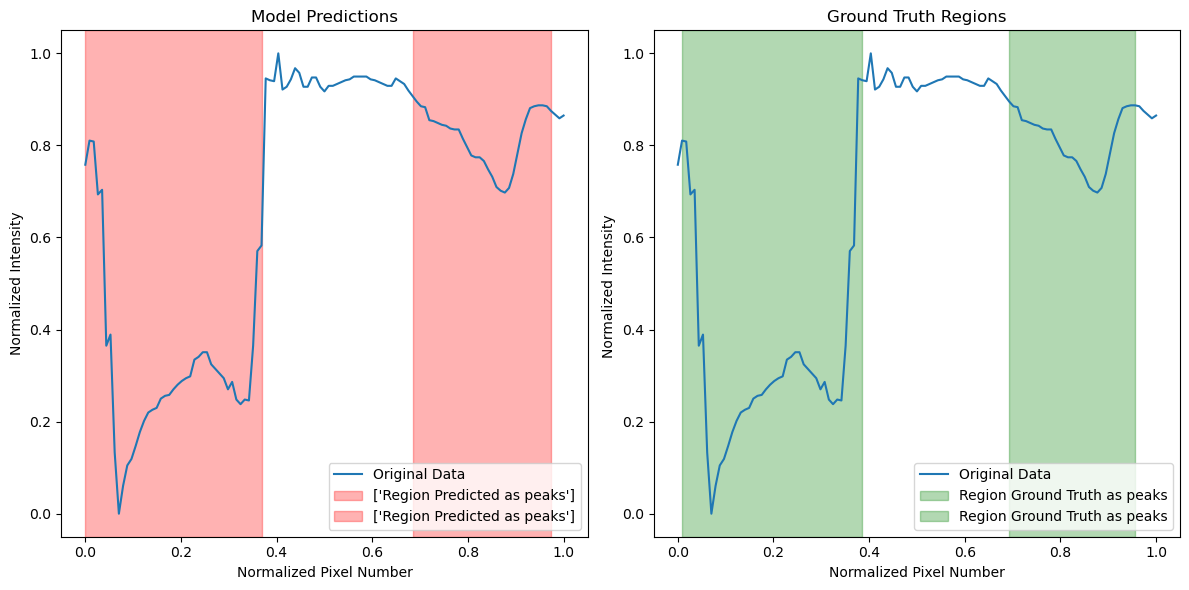

Accuracy: 0.95
Precision: 0.95
Recall (TP/(TP+FN)): 0.97
F1 Score (harmonic mean of precision and recall): 0.96
19-0-002_jpg.rf.1b4e5e5104b286856c86baed70875f4d.jpg.txt_labeled.txt
4/4 [==============================] - 0s 786us/step


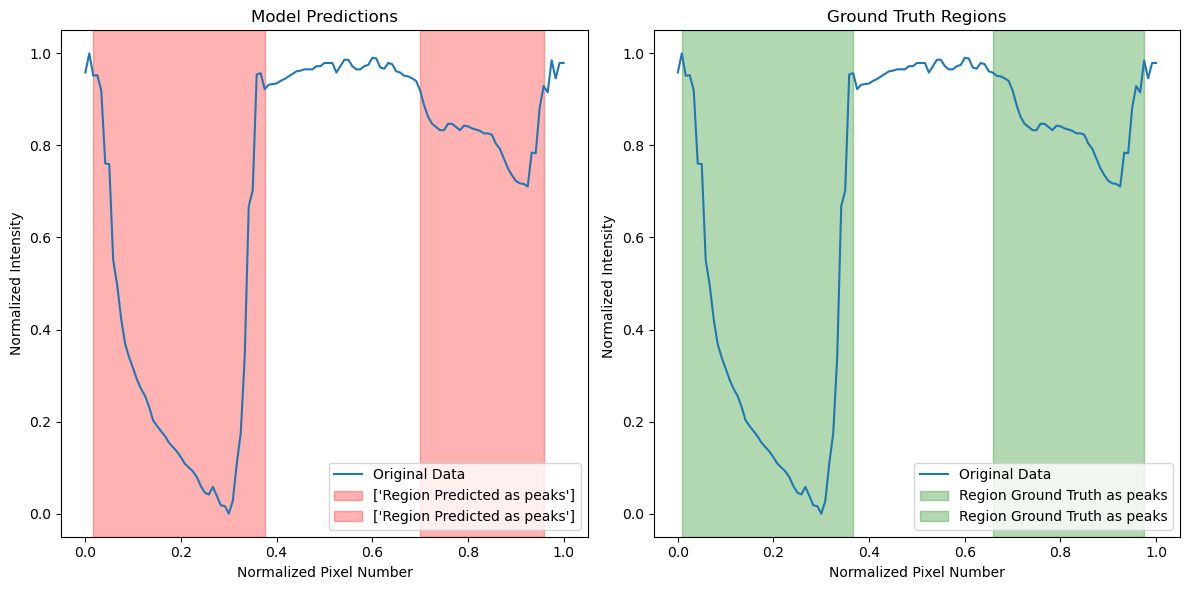

Accuracy: 0.93
Precision: 0.99
Recall (TP/(TP+FN)): 0.90
F1 Score (harmonic mean of precision and recall): 0.94
6-50_jpg.rf.46118e51ff827b16e9f6b093cac99fdd.jpg.txt_labeled.txt
3/3 [==============================] - 0s 734us/step


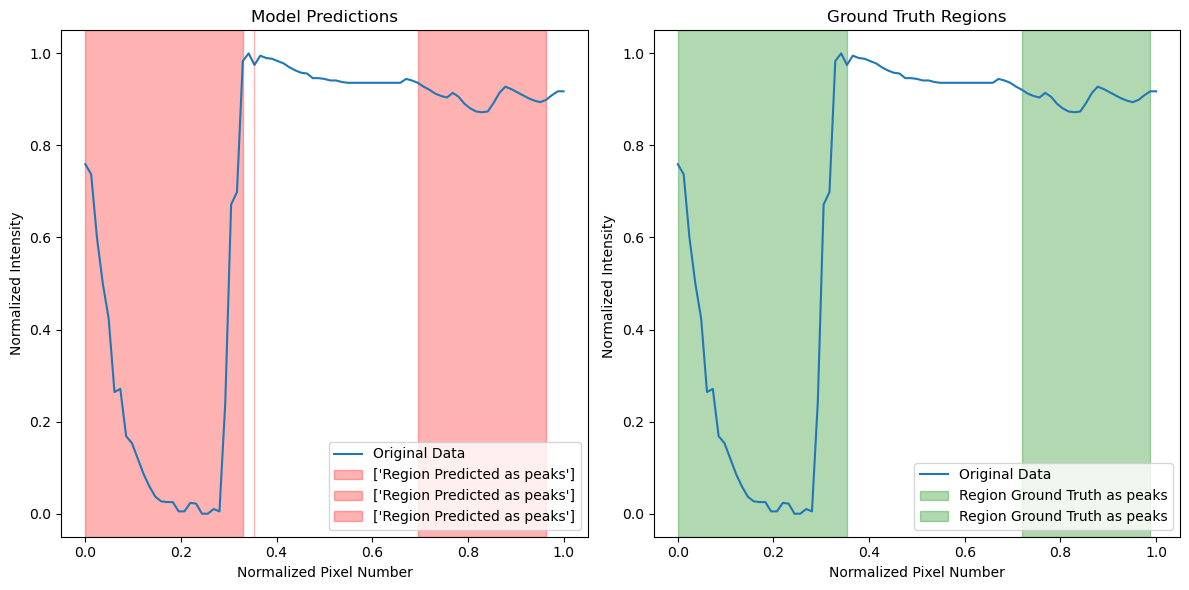

Accuracy: 0.94
Precision: 0.96
Recall (TP/(TP+FN)): 0.94
F1 Score (harmonic mean of precision and recall): 0.95
61-250_jpg.rf.79463515246f34f9eefc68870f7b736b.jpg.txt_labeled.txt
4/4 [==============================] - 0s 614us/step


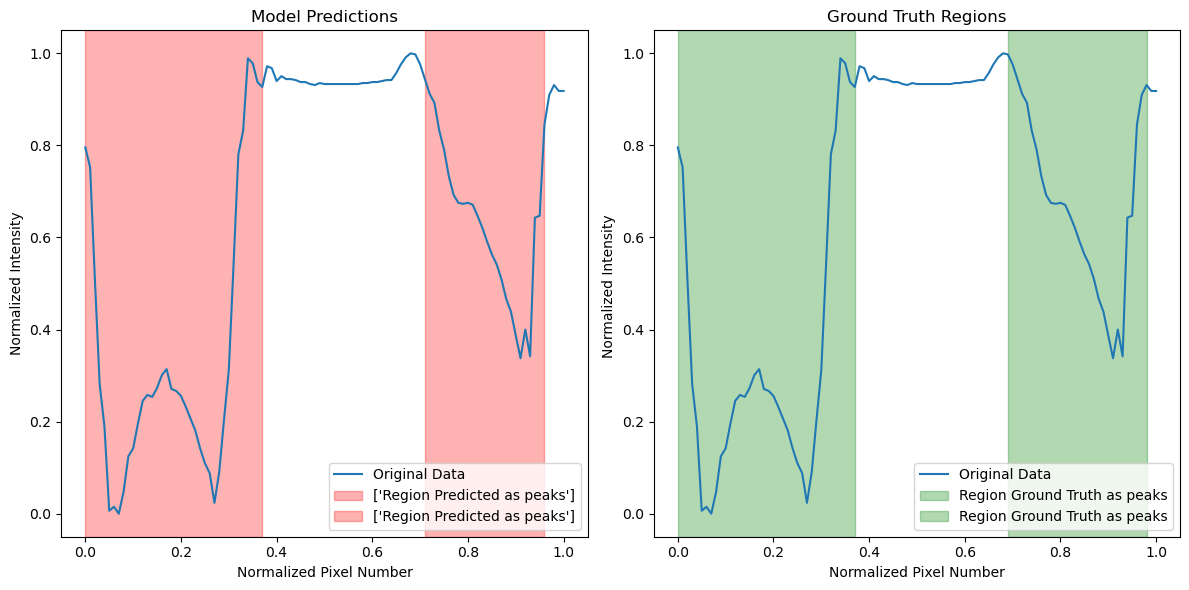

Accuracy: 0.96
Precision: 1.00
Recall (TP/(TP+FN)): 0.94
F1 Score (harmonic mean of precision and recall): 0.97
24-0-8_jpg.rf.b898bc131ed1db7863f38cd820d0ecfb.jpg.txt_labeled.txt
4/4 [==============================] - 0s 2ms/step


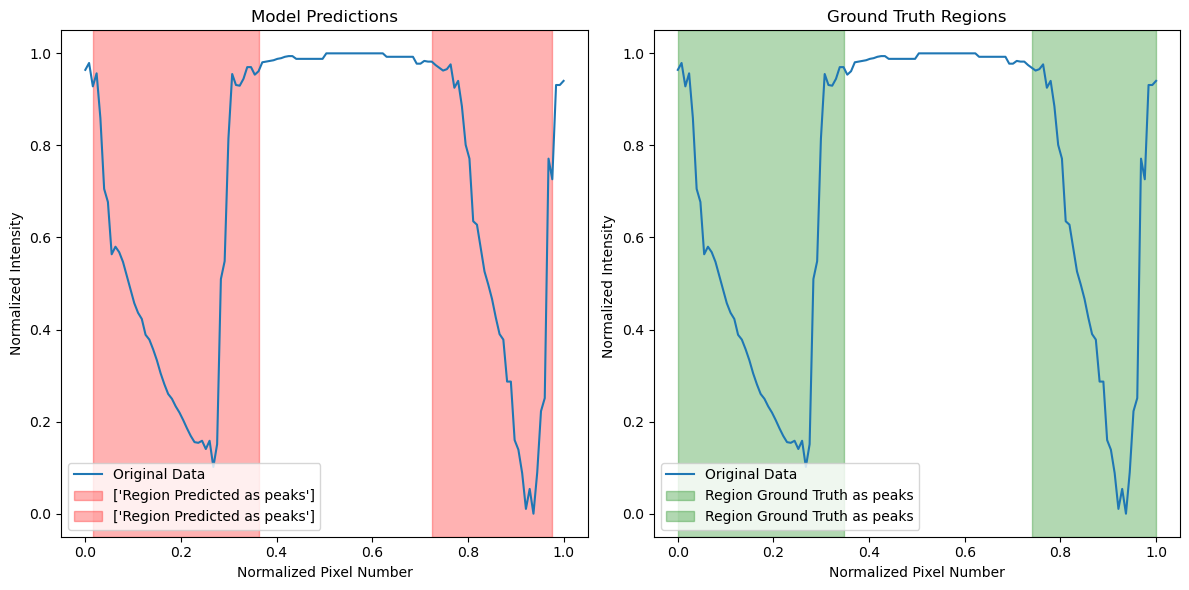

Accuracy: 0.93
Precision: 0.95
Recall (TP/(TP+FN)): 0.94
F1 Score (harmonic mean of precision and recall): 0.94
45-100_jpg.rf.ad6182fc40baf772d8defd7ced55d8c9.jpg.txt_labeled.txt
3/3 [==============================] - 0s 693us/step


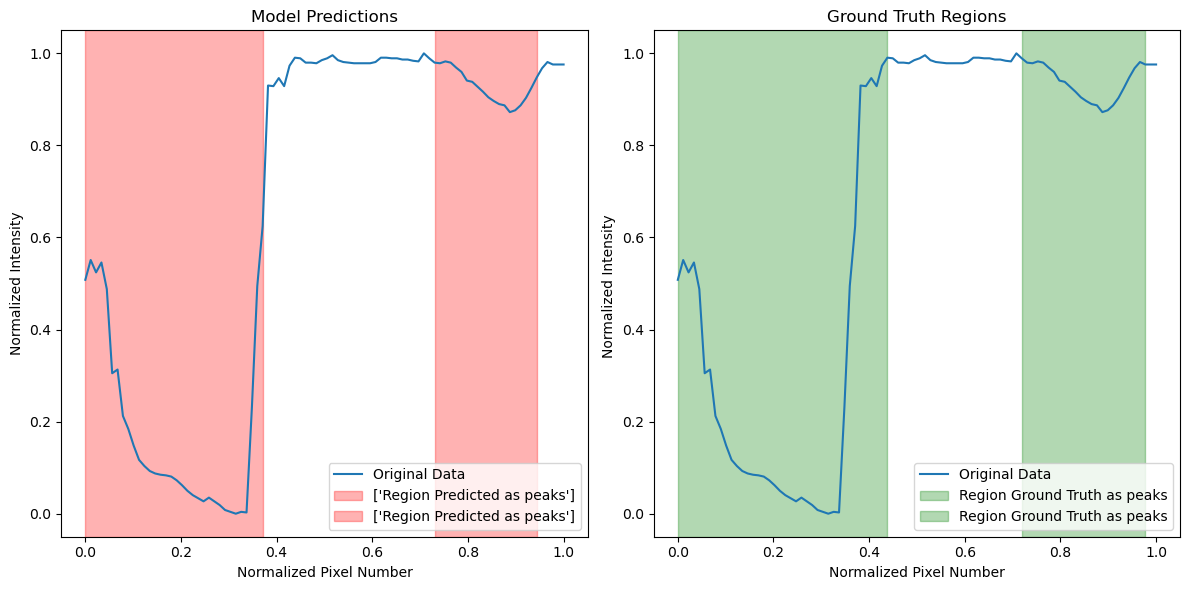

Accuracy: 0.89
Precision: 1.00
Recall (TP/(TP+FN)): 0.84
F1 Score (harmonic mean of precision and recall): 0.92
60-100-_jpg.rf.e121d5394830297dc518fe57bba3d0b6.jpg.txt_labeled.txt
4/4 [==============================] - 0s 555us/step


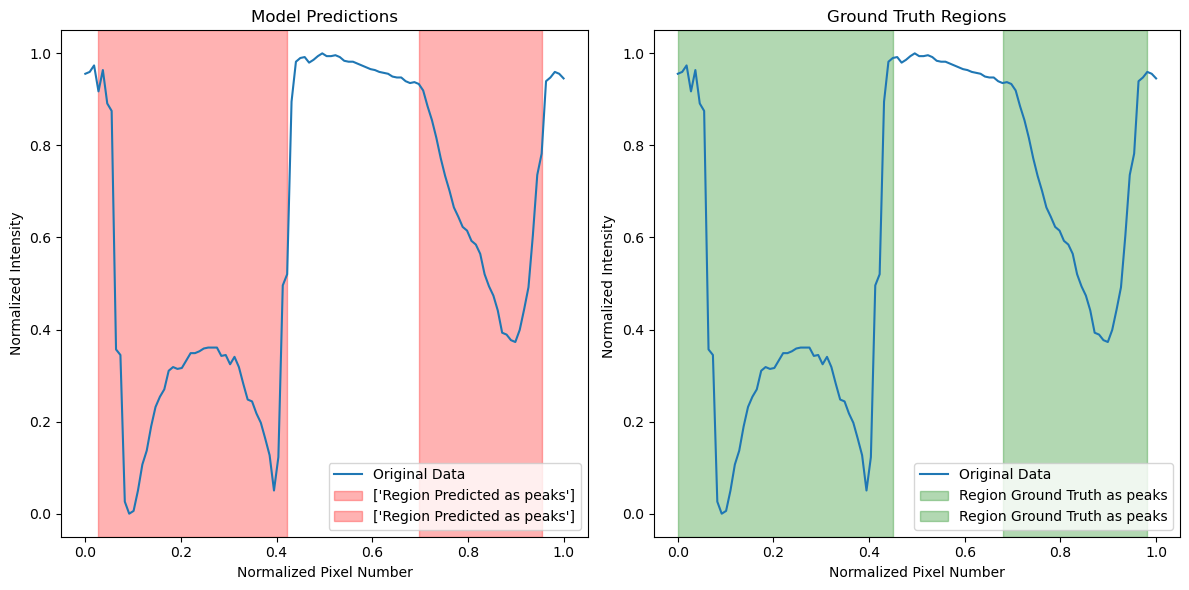

Accuracy: 0.90
Precision: 1.00
Recall (TP/(TP+FN)): 0.87
F1 Score (harmonic mean of precision and recall): 0.93
23-250_jpg.rf.14e1771b527f9ce67c302301ac7f9271.jpg.txt_labeled.txt
4/4 [==============================] - 0s 1ms/step


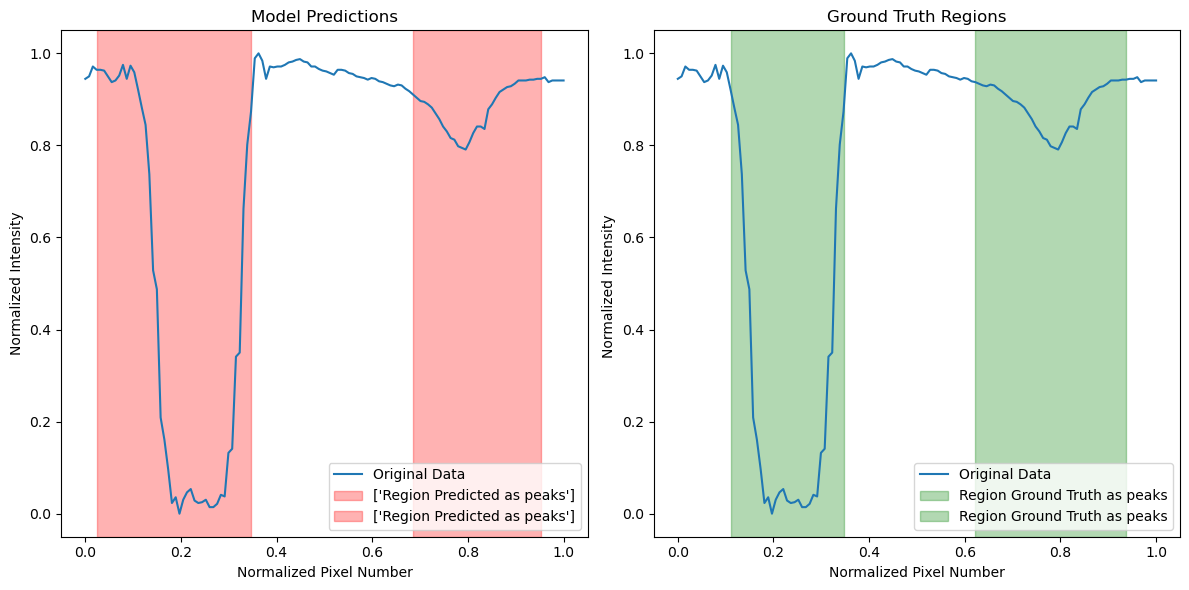

Accuracy: 0.84
Precision: 0.83
Recall (TP/(TP+FN)): 0.89
F1 Score (harmonic mean of precision and recall): 0.86
26-250_jpg.rf.6050078cce946846fc08f0a38fd1fd1d.jpg.txt_labeled.txt
4/4 [==============================] - 0s 994us/step


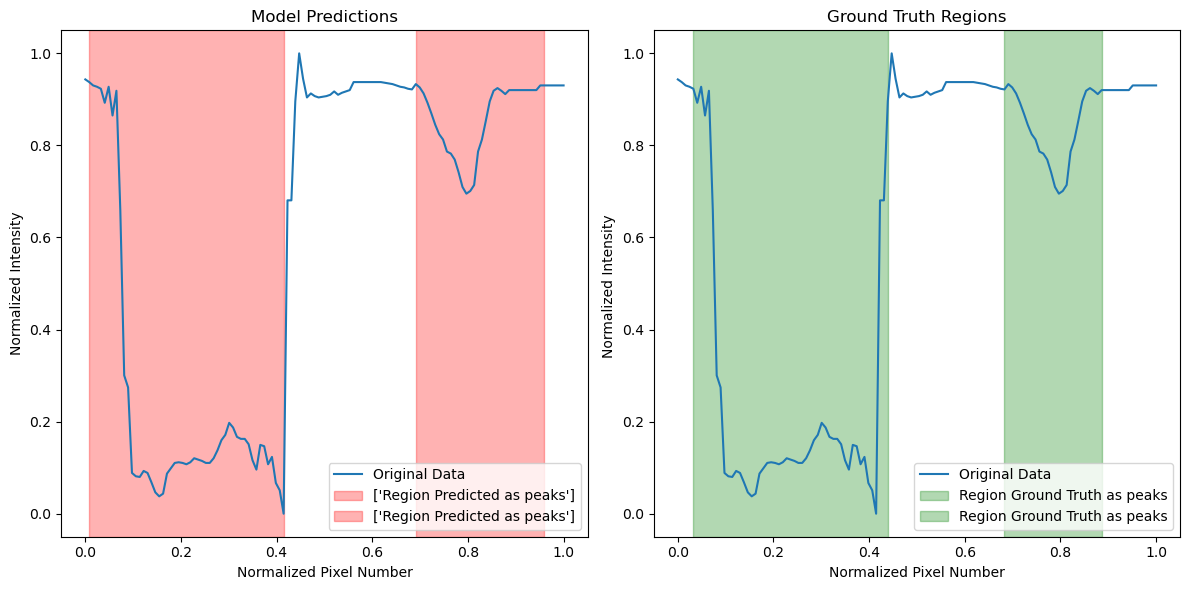

Accuracy: 0.87
Precision: 0.86
Recall (TP/(TP+FN)): 0.95
F1 Score (harmonic mean of precision and recall): 0.90
57-250_jpg.rf.7d05d71e6ccaa1f1bf9c77121a78fd8d.jpg.txt_labeled.txt
3/3 [==============================] - 0s 986us/step


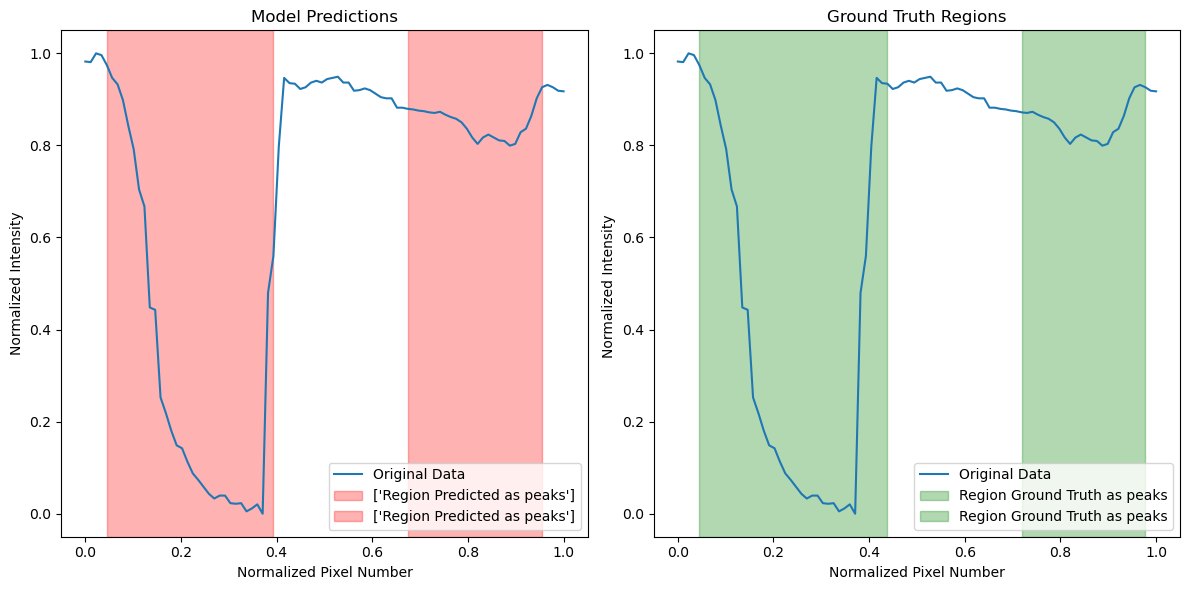

Accuracy: 0.89
Precision: 0.93
Recall (TP/(TP+FN)): 0.90
F1 Score (harmonic mean of precision and recall): 0.92
24-1_jpg.rf.0ff3e377aeee2658d6b0108b88aefabf.jpg.txt_labeled.txt
5/5 [==============================] - 0s 1ms/step


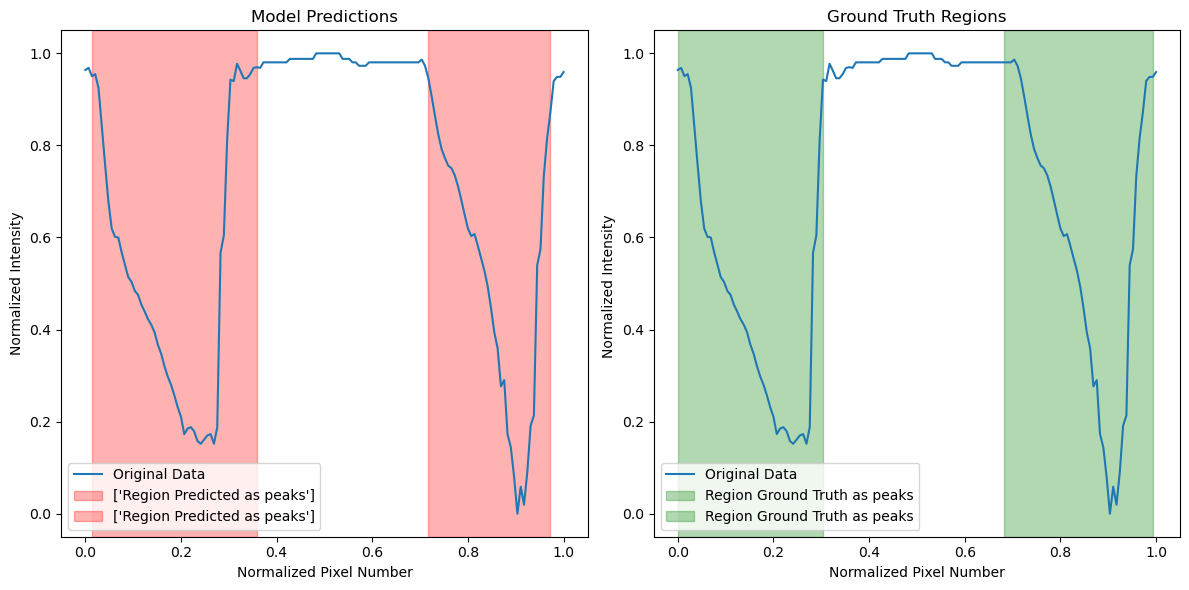

Accuracy: 0.88
Precision: 0.91
Recall (TP/(TP+FN)): 0.89
F1 Score (harmonic mean of precision and recall): 0.90
Average accuracy of the model:  0.9017142233477792
Average precision of the model:  0.9333966743048744
Average recall of the model:  0.9192961941042016
Average f1 score of the model:  0.9243554044619324


In [22]:
loaded_model = load_model(path + 'final_best_CT_18-12-23')

path_test_files = "/Users/ldosnon/Desktop/data_yolov8/Peak_segmentation_database/labeled_array/CT/test/"

process_test(path_test_files)
